# Assessment

## Part 1: London’s underground resilience

### I. Topological network

### I.1. Centrality measures:

In [1]:
# we will import all the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

In [2]:
G=nx.read_graphml("outputs/london.graph")

In [3]:
# Print information about the Graph
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [4]:
# To check edges attributes:
list(G.edges(data = True))[0:5]

[('Cambridge Heath',
  'Bethnal Green',
  {'length': 831.8715882483676,
   'line_name': 'London Overground',
   'flows': 13816}),
 ('Cambridge Heath',
  'London Fields',
  {'length': 979.4169859715055,
   'line_name': 'London Overground',
   'flows': 14266}),
 ('Bethnal Green',
  'Liverpool Street',
  {'length': 2407.221146455031, 'line_name': 'Central', 'flows': 34135}),
 ('Bethnal Green',
  'Mile End',
  {'length': 1992.4218024905383, 'line_name': 'Central', 'flows': 11511}),
 ('London Fields',
  'Hackney Downs',
  {'length': 926.0127117881532,
   'line_name': 'London Overground',
   'flows': 14238})]

In [5]:
# To check node attributes:
list(G.nodes(data = True))[0:5]

[('Cambridge Heath', {'coords': '(534826.876705217, 183290.99677941797)'}),
 ('Bethnal Green', {'coords': '(534856.0703132264, 182541.39945969448)'}),
 ('London Fields', {'coords': '(534782.9411729403, 184260.4701793216)'}),
 ('Hackney Downs', {'coords': '(534531.0425008993, 185134.56828449317)'}),
 ('Rectory Road', {'coords': '(533997.280296415, 186185.00534536556)'})]

In [6]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

In [7]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Cambridge Heath', {'coords': (534826.876705217, 183290.99677941797)})

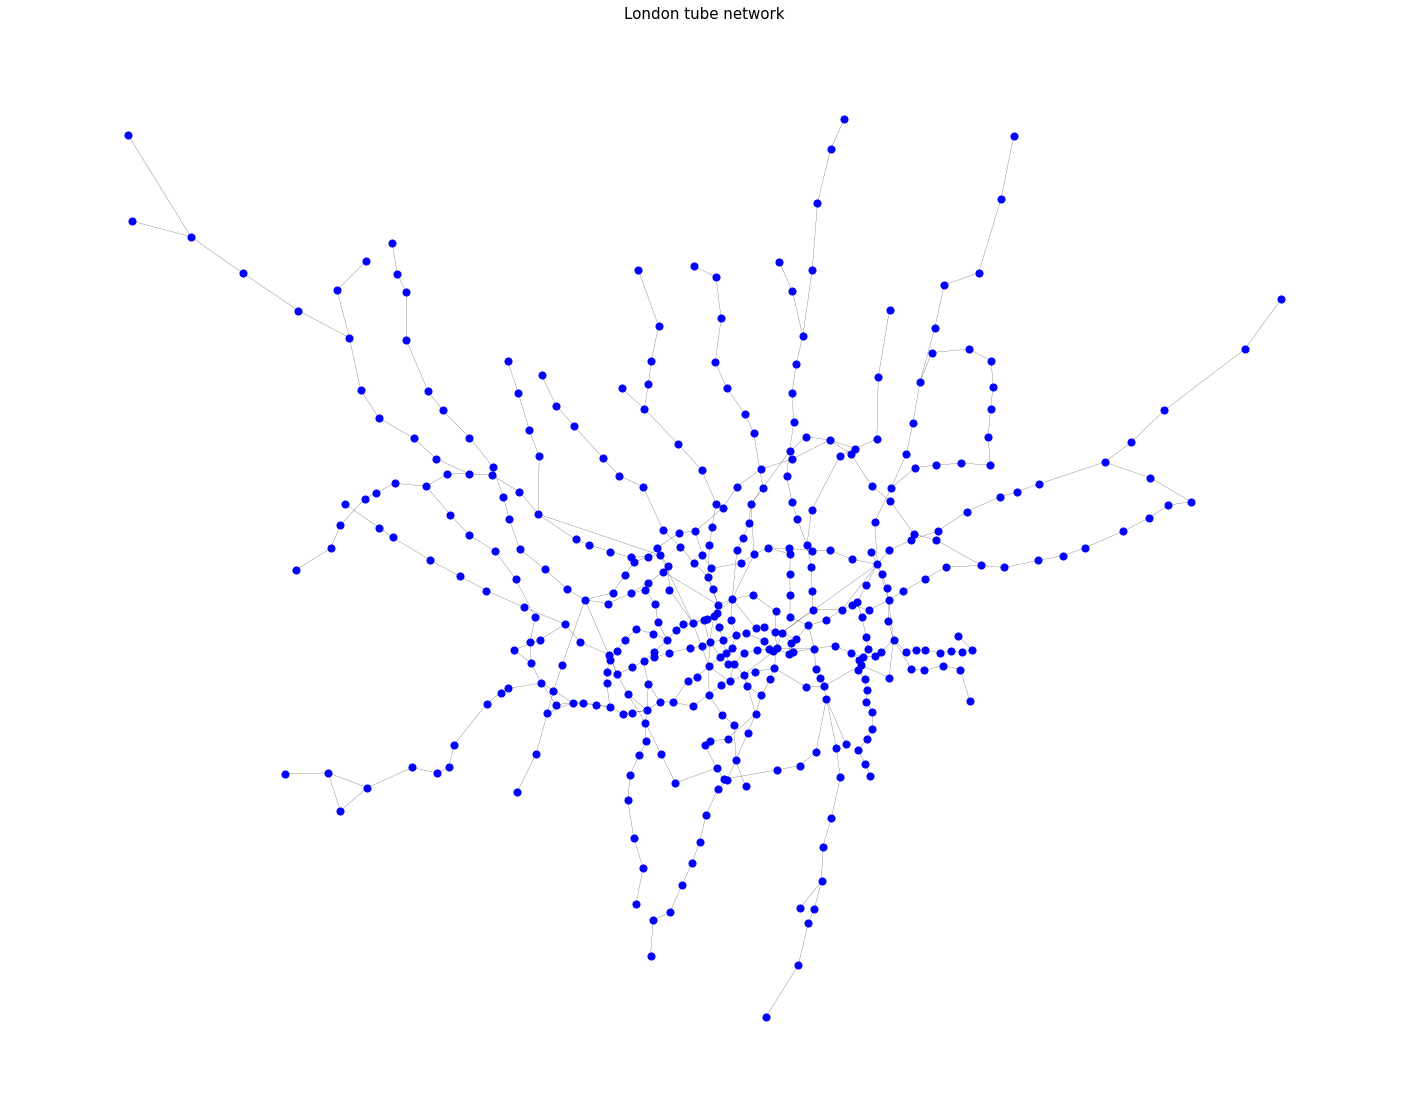

In [8]:
# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(25,20))

#node_labels = nx.get_node_attributes(G, 'station_name')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=50,node_color='b')
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2)
#nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=15)
plt.axis("off")
plt.show()

### 1. Degree centrality

In [9]:
#Let us compute the degree centrality
deg_underground=nx.degree_centrality(G)

In [10]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(G,dict(deg_underground),'degree')

# To check nodes attributes
list(G.nodes(data=True))[0:5]

[('Cambridge Heath',
  {'coords': (534826.876705217, 183290.99677941797), 'degree': 0.005}),
 ('Bethnal Green',
  {'coords': (534856.0703132264, 182541.39945969448), 'degree': 0.0075}),
 ('London Fields',
  {'coords': (534782.9411729403, 184260.4701793216), 'degree': 0.005}),
 ('Hackney Downs',
  {'coords': (534531.0425008993, 185134.56828449317), 'degree': 0.0075}),
 ('Rectory Road',
  {'coords': (533997.280296415, 186185.00534536556), 'degree': 0.005})]

In [11]:
# Return degree attributes that we will use for the colour of nodes 
deg_color=[(node['degree']) for i, node in G.nodes(data=True)]

In [12]:
# For setting node size based on degree values
deg_size=[(float(node['degree'])/max(deg_color)*100) for i, node in G.nodes(data=True)]

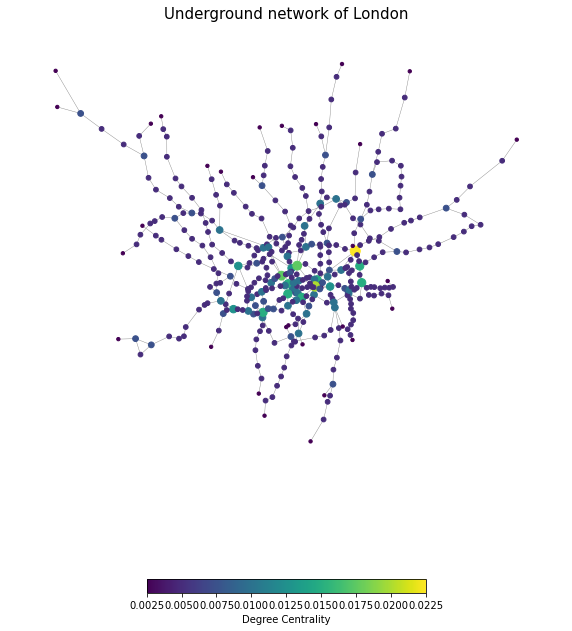

In [13]:
#we can plot the graph using the measure of degree:

fig, ax = plt.subplots(figsize=(10,12))

pos = nx.get_node_attributes(G, 'coords')
#nx.draw_networkx_labels(G, pos,font_size=9,
        #font_color='black')
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Underground network of London",fontsize=15)
plt.show()

In [14]:
degree=sorted([(node['degree']) for i, node in G.nodes(data=True)],reverse=True)
print(degree[0:20])

[0.0225, 0.02, 0.0175, 0.0175, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.0125, 0.0125, 0.0125, 0.0125, 0.01, 0.01, 0.01, 0.01, 0.01]


In [15]:
def get_keys(d, value):
    return [k for k,v in d if v['degree'] == value]
get_keys(G.nodes(data=True), 0.0225)

['Stratford']

In [16]:
for i in degree[0:11]:
    print(get_keys(G.nodes(data=True), i))

['Stratford']
['Bank and Monument']
['Baker Street', "King's Cross St. Pancras"]
['Baker Street', "King's Cross St. Pancras"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Oxford Circus', 'Waterloo', 'Green Park', 'West Ham', 'Canning Town', "Earl's Court"]


In [17]:
G.nodes(data=True)['Stratford']['degree']

0.0225

In [18]:
G.nodes(data=True)['Bank and Monument']['degree']

0.02

### 2. Closeness centrality

In [19]:
# Lets compute closeness
clos_underground=nx.closeness_centrality(G)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,clos_underground,'closeness')

# To check nodes attributes
list(G.nodes(data=True))[0:5]

[('Cambridge Heath',
  {'coords': (534826.876705217, 183290.99677941797),
   'degree': 0.005,
   'closeness': 0.0930448941614329}),
 ('Bethnal Green',
  {'coords': (534856.0703132264, 182541.39945969448),
   'degree': 0.0075,
   'closeness': 0.10070493454179255}),
 ('London Fields',
  {'coords': (534782.9411729403, 184260.4701793216),
   'degree': 0.005,
   'closeness': 0.08684324793747286}),
 ('Hackney Downs',
  {'coords': (534531.0425008993, 185134.56828449317),
   'degree': 0.0075,
   'closeness': 0.0827300930713547}),
 ('Rectory Road',
  {'coords': (533997.280296415, 186185.00534536556),
   'degree': 0.005,
   'closeness': 0.08178286648947046})]

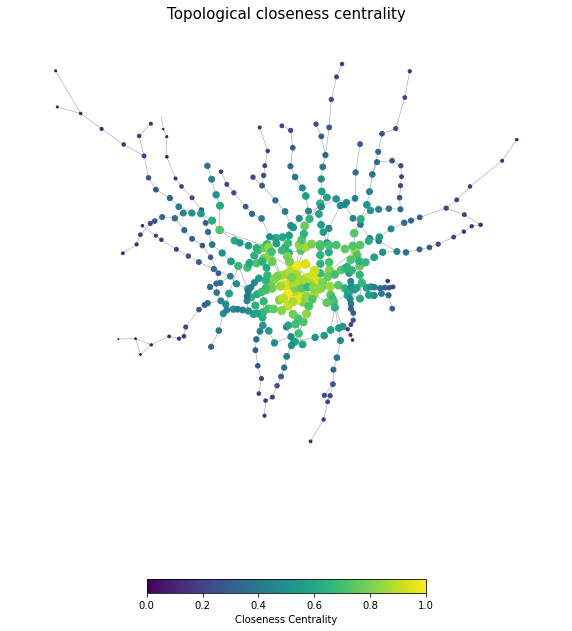

In [20]:
# Set color and size
# Closeness values
clos_val=[(i[1]['closeness']) for i in G.nodes(data=True)]


normalised_clos_underground=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))) for i in G.nodes(data=True)]
clos_underground_size=[((i[1]['closeness']-min(clos_val))/(max(clos_val)-min(clos_val))*80) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos = nx.get_node_attributes(G, 'coords')
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
#nx.draw_networkx_labels(G, pos,font_size=9,
        #font_color='black')
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= normalised_clos_underground,
        node_size=clos_underground_size )

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Topological closeness centrality",fontsize=15)
plt.show()

In [21]:
closeness=sorted([(node['closeness']) for i, node in G.nodes(data=True)],reverse=True)
print(closeness[0:20])

[0.11477761836441894, 0.1135718341851221, 0.11344299489506524, 0.11254924029262803, 0.11226494527083918, 0.11120378092855157, 0.11098779134295228, 0.11074197120708748, 0.11074197120708748, 0.11031439602868175, 0.11025358324145534, 0.10982976386600769, 0.1092001092001092, 0.1092001092001092, 0.1089621356578589, 0.10813733441470667, 0.1072961373390558, 0.10692328254477412, 0.1068090787716956, 0.10626992561105207]


In [22]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness'] == value]

for i in closeness[0:11]:
    print(get_keys_2(G.nodes(data=True), i))

['Green Park']
['Bank and Monument']
["King's Cross St. Pancras"]
['Westminster']
['Waterloo']
['Oxford Circus']
['Bond Street']
['Farringdon', 'Angel']
['Farringdon', 'Angel']
['Moorgate']
['Liverpool Street']


### 3. Betweenness centrality

In [23]:
#Topological betweenness centrality for the network 
bet_underground=nx.betweenness_centrality(G,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G,bet_underground,'betweenness')

# To check nodes attributes
list(G.nodes(data=True))[0:5]

[('Cambridge Heath',
  {'coords': (534826.876705217, 183290.99677941797),
   'degree': 0.005,
   'closeness': 0.0930448941614329,
   'betweenness': 0.029591442079224033}),
 ('Bethnal Green',
  {'coords': (534856.0703132264, 182541.39945969448),
   'degree': 0.0075,
   'closeness': 0.10070493454179255,
   'betweenness': 0.03690393959284936}),
 ('London Fields',
  {'coords': (534782.9411729403, 184260.4701793216),
   'degree': 0.005,
   'closeness': 0.08684324793747286,
   'betweenness': 0.025732837233777076}),
 ('Hackney Downs',
  {'coords': (534531.0425008993, 185134.56828449317),
   'degree': 0.0075,
   'closeness': 0.0827300930713547,
   'betweenness': 0.024208132615087485}),
 ('Rectory Road',
  {'coords': (533997.280296415, 186185.00534536556),
   'degree': 0.005,
   'closeness': 0.08178286648947046,
   'betweenness': 0.006630504833512366})]

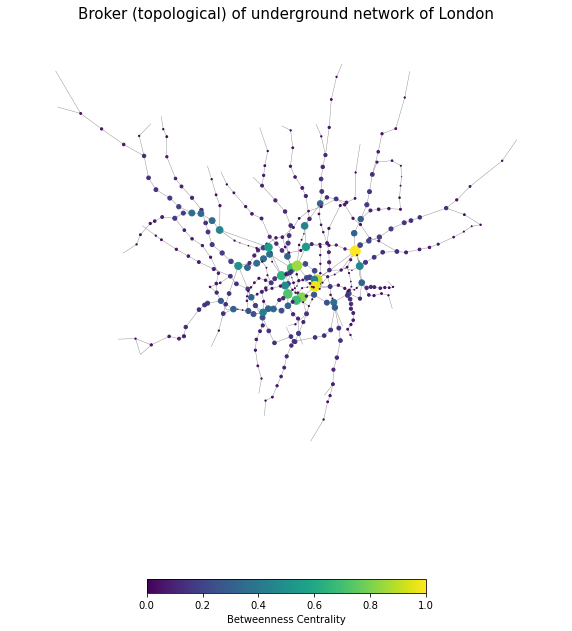

In [24]:
betweenness_values=[(i[1]['betweenness']) for i in G.nodes(data=True)]


# Lets set color and size of nodes according to betweenness values
bet_color=[(i[1]['betweenness']/max(betweenness_values)) for i in G.nodes(data=True)]
bet_size=[(i[1]['betweenness']/max(betweenness_values)*100) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(10,12))

pos = nx.get_node_attributes(G, 'coords')
nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
#nx.draw_networkx_labels(G, pos,font_size=9,
        #font_color='black')
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_color,
        node_size= bet_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("Broker (topological) of underground network of London",fontsize=15)
plt.show()

In [25]:
betweenness=sorted([(node['betweenness']) for i, node in G.nodes(data=True)],reverse=True)
print(betweenness[0:20])

[0.2978457823852554, 0.2904894604838215, 0.27080685525140374, 0.25530728652439144, 0.2439208311181999, 0.215834863583924, 0.20832425399718624, 0.20333528717175325, 0.19156776455930605, 0.165084686825288, 0.16198541537827246, 0.15137332011486138, 0.1415909931755798, 0.1393436246641135, 0.13509791343437963, 0.13052420011066623, 0.13016865124571916, 0.12589232777108697, 0.10826685852437733, 0.10764763640703481]


In [26]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness'] == value]

for i in betweenness[0:11]:
    print(get_keys_3(G.nodes(data=True), i))

['Stratford']
['Bank and Monument']
['Liverpool Street']
["King's Cross St. Pancras"]
['Waterloo']
['Green Park']
['Euston']
['Westminster']
['Baker Street']
['Finchley Road']
['Highbury & Islington']


### I.2. Impact measures:

In [27]:
# diameter of the network
nx.diameter(G)

36

In [28]:
# number of connected components
nx.number_connected_components(G)

1

In [29]:
# Number of existing nodes:
l=list(G.nodes)
len(l)

401

In [30]:
G_deg=[(i[1]['degree']) for i in G.nodes(data=True)]

from statistics import mean
av_deg_G= mean(G_deg)
av_deg_G

0.005822942643391522

In [31]:
G_sp=nx.average_shortest_path_length(G)
G_sp

13.545997506234414

In [32]:
G_cc=nx.average_clustering(G)
G_cc

0.030382377389858686

In [33]:
nx.global_efficiency(G)

0.10125619359721548

#### 1. Degree centrality

#### 1.1 not sequential

In [34]:
G1=G.copy()

#### 1

In [35]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G1.remove_nodes_from(['Stratford'])

# number of connected components
nx.number_connected_components(G1)

3

In [36]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[379, 1, 20]

In [37]:
nx.global_efficiency(G1)

0.08891736066511553

#### 2

In [38]:
G1.remove_nodes_from(['Bank and Monument'])
nx.number_connected_components(G1)

3

In [39]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[378, 1, 20]

In [40]:
nx.global_efficiency(G1)

0.08586164448743419

#### 3

In [41]:
G1.remove_nodes_from(['Baker Street'])
nx.number_connected_components(G1)

3

In [42]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[377, 1, 20]

In [43]:
nx.global_efficiency(G1)

0.08203328759058377

#### 4

In [44]:
G1.remove_nodes_from(["King's Cross St. Pancras"])
nx.number_connected_components(G1)

4

In [45]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[374, 2, 1, 20]

In [46]:
nx.global_efficiency(G1)

0.07570039409751314

#### 5

In [47]:
G1.remove_nodes_from(["Liverpool Street"])
nx.number_connected_components(G1)

5

In [48]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[368, 2, 5, 1, 20]

In [49]:
nx.global_efficiency(G1)

0.07390298386351715

#### 6

In [50]:
G1.remove_nodes_from(["Oxford Circus"])
nx.number_connected_components(G1)

6

In [51]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[366, 2, 5, 1, 1, 20]

In [52]:
nx.global_efficiency(G1)

0.07260142854781701

#### 7

In [53]:
G1.remove_nodes_from(["Waterloo"])
nx.number_connected_components(G1)

6

In [54]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[365, 2, 5, 1, 1, 20]

In [55]:
nx.global_efficiency(G1)

0.07070680078459504

#### 8

In [56]:
G1.remove_nodes_from(["Green Park"])
nx.number_connected_components(G1)

6

In [57]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[364, 2, 5, 1, 1, 20]

In [58]:
nx.global_efficiency(G1)

0.06997942678414801

#### 9

In [59]:
G1.remove_nodes_from(["West Ham"])
nx.number_connected_components(G1)

7

In [60]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[361, 2, 5, 1, 2, 1, 20]

In [61]:
nx.global_efficiency(G1)

0.06757871689605423

#### 10

In [62]:
G1.remove_nodes_from(["Canning Town"])
nx.number_connected_components(G1)

10

In [63]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[346, 2, 5, 1, 2, 1, 8, 1, 5, 20]

In [64]:
nx.global_efficiency(G1)

0.06373592086177626

#### 11

In [65]:
G1.remove_nodes_from(["Earl's Court"])
nx.number_connected_components(G1)

10

In [66]:
# To comput the size ( number of node) of each component
Subg1 = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
[len(subgraph.nodes) for subgraph in Subg1]

[345, 2, 5, 1, 2, 1, 8, 1, 5, 20]

In [67]:
nx.global_efficiency(G1)

0.06206140366807164

#### 1.2 sequential

In [68]:
G4=G.copy()

#### remove highest 1

In [69]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(['Stratford'])

# number of connected components
nx.number_connected_components(G4)

3

In [70]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[379, 1, 20]

In [71]:
nx.global_efficiency(G4)

0.08891736066511553

#### recompute centrality

In [72]:
#Let us compute the degree centrality
deg_underground_new=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new),'degree_new')

In [73]:
degree_new=sorted([(node['degree_new']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new[0:20])

[0.020050125313283207, 0.017543859649122806, 0.017543859649122806, 0.015037593984962405, 0.015037593984962405, 0.015037593984962405, 0.015037593984962405, 0.015037593984962405, 0.012531328320802004, 0.012531328320802004, 0.012531328320802004, 0.012531328320802004, 0.012531328320802004, 0.012531328320802004, 0.010025062656641603, 0.010025062656641603, 0.010025062656641603, 0.010025062656641603, 0.010025062656641603, 0.010025062656641603]


In [74]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new'] == value]

for i in degree_new[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Bank and Monument']
['Baker Street', "King's Cross St. Pancras"]
['Baker Street', "King's Cross St. Pancras"]
['Oxford Circus', 'Waterloo', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Waterloo', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Waterloo', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Waterloo', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Waterloo', 'Green Park', 'Canning Town', "Earl's Court"]
['Liverpool Street', 'Willesden Junction', 'Shadwell', 'Euston', 'West Ham', 'Turnham Green']
['Liverpool Street', 'Willesden Junction', 'Shadwell', 'Euston', 'West Ham', 'Turnham Green']


#### remove highest 2

In [75]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(['Bank and Monument'])

# number of connected components
nx.number_connected_components(G4)

3

In [76]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[378, 1, 20]

In [77]:
nx.global_efficiency(G4)

0.08586164448743419

#### recompute centrality

In [78]:
#Let us compute the degree centrality
deg_underground_new2=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new2),'degree_new2')

In [79]:
degree_new2=sorted([(node['degree_new2']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new2[0:20])

[0.017587939698492462, 0.017587939698492462, 0.01507537688442211, 0.01507537688442211, 0.01507537688442211, 0.01507537688442211, 0.01256281407035176, 0.01256281407035176, 0.01256281407035176, 0.01256281407035176, 0.01256281407035176, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407, 0.010050251256281407]


In [80]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new2'] == value]

for i in degree_new2[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Baker Street', "King's Cross St. Pancras"]
['Baker Street', "King's Cross St. Pancras"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']


#### remove highest 3

In [81]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(['Baker Street'])

# number of connected components
nx.number_connected_components(G4)

3

In [82]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[377, 1, 20]

In [83]:
nx.global_efficiency(G4)

0.08203328759058377

#### recompute centrality

In [84]:
#Let us compute the degree centrality
deg_underground_new3=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new3),'degree_new3')

In [85]:
degree_new3=sorted([(node['degree_new3']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new3[0:20])

[0.017632241813602016, 0.015113350125944584, 0.015113350125944584, 0.015113350125944584, 0.015113350125944584, 0.012594458438287152, 0.012594458438287152, 0.012594458438287152, 0.012594458438287152, 0.012594458438287152, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723, 0.010075566750629723]


In [86]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new3'] == value]

for i in degree_new3[0:10]:
    print(get_keys(G4.nodes(data=True), i))

["King's Cross St. Pancras"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Euston', 'Waterloo', 'West Ham', 'Turnham Green']


#### remove highest 4

In [87]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["King's Cross St. Pancras"])

# number of connected components
nx.number_connected_components(G4)

4

In [88]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[374, 2, 1, 20]

In [89]:
nx.global_efficiency(G4)

0.07570039409751314

#### recompute centrality

In [90]:
#Let us compute the degree centrality
deg_underground_new4=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new4),'degree_new4')

In [91]:
degree_new4=sorted([(node['degree_new4']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new4[0:20])

[0.015151515151515152, 0.015151515151515152, 0.015151515151515152, 0.015151515151515152, 0.012626262626262628, 0.012626262626262628, 0.012626262626262628, 0.012626262626262628, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102]


In [92]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new4'] == value]

for i in degree_new4[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Oxford Circus', 'Green Park', 'Canning Town', "Earl's Court"]
['Willesden Junction', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'West Ham', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'West Brompton', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Piccadilly Circus', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Tottenham Court Road', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpo

#### remove highest 5

In [93]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Oxford Circus"])

# number of connected components
nx.number_connected_components(G4)

5

In [94]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[372, 2, 1, 1, 20]

In [95]:
nx.global_efficiency(G4)

0.07439630304322176

#### recompute centrality

In [96]:
#Let us compute the degree centrality
deg_underground_new5=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new5),'degree_new5')

In [97]:
degree_new5=sorted([(node['degree_new5']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new5[0:20])

[0.01518987341772152, 0.01518987341772152, 0.012658227848101266, 0.012658227848101266, 0.012658227848101266, 0.012658227848101266, 0.012658227848101266, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013, 0.010126582278481013]


In [98]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new5'] == value]

for i in degree_new5[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Canning Town', "Earl's Court"]
['Canning Town', "Earl's Court"]
['Willesden Junction', 'Waterloo', 'Green Park', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'West Ham', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'West Ham', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'West Brompton', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'West Brompt

#### remove highest 6

In [99]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Canning Town"])

# number of connected components
nx.number_connected_components(G4)

7

In [100]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[358, 2, 1, 8, 1, 5, 20]

In [101]:
nx.global_efficiency(G4)

0.06913739815715683

#### recompute centrality

In [102]:
#Let us compute the degree centrality
deg_underground_new6=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new6),'degree_new6')

In [103]:
degree_new6=sorted([(node['degree_new6']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new6[0:20])

[0.015228426395939085, 0.012690355329949238, 0.012690355329949238, 0.012690355329949238, 0.012690355329949238, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939, 0.01015228426395939]


In [104]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new6'] == value]

for i in degree_new6[0:10]:
    print(get_keys(G4.nodes(data=True), i))

["Earl's Court"]
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'West Brompton', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'West Brompton', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Whar

#### remove highest 7

In [105]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Earl's Court"])

# number of connected components
nx.number_connected_components(G4)

7

In [106]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[357, 2, 1, 8, 1, 5, 20]

In [107]:
nx.global_efficiency(G4)

0.06752042239526457

#### recompute centrality

In [108]:
#Let us compute the degree centrality
deg_underground_new7=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new7),'degree_new7')

In [109]:
degree_new7=sorted([(node['degree_new7']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new7[0:20])

[0.012722646310432571, 0.012722646310432571, 0.012722646310432571, 0.012722646310432571, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057, 0.010178117048346057]


In [110]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new7'] == value]

for i in degree_new7[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Willesden Junction', 'Waterloo', 'Green Park', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', "Shepherd's Bush", 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton 

#### remove highest 8

In [111]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Willesden Junction"])

# number of connected components
nx.number_connected_components(G4)

8

In [112]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[343, 13, 2, 1, 8, 1, 5, 20]

In [113]:
nx.global_efficiency(G4)

0.05977861469470188

#### recompute centrality

In [114]:
#Let us compute the degree centrality
deg_underground_new8=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new8),'degree_new8')

In [115]:
degree_new8=sorted([(node['degree_new8']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new8[0:20])

[0.012755102040816325, 0.012755102040816325, 0.012755102040816325, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306, 0.01020408163265306]


In [116]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new8'] == value]

for i in degree_new8[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Waterloo', 'Green Park', 'Turnham Green']
['Waterloo', 'Green Park', 'Turnham Green']
['Waterloo', 'Green Park', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Embankment', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Westminster', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town', 'Kennington']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell',

#### remove highest 9

In [117]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Waterloo"])

# number of connected components
nx.number_connected_components(G4)

8

In [118]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[342, 13, 2, 1, 8, 1, 5, 20]

In [119]:
nx.global_efficiency(G4)

0.05765035832455064

#### recompute centrality

In [120]:
#Let us compute the degree centrality
deg_underground_new9=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new9),'degree_new9')

In [121]:
degree_new9=sorted([(node['degree_new9']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new9[0:20])

[0.012787723785166242, 0.012787723785166242, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993, 0.010230179028132993]


In [122]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new9'] == value]

for i in degree_new9[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Green Park', 'Turnham Green']
['Green Park', 'Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Victoria', 'Finsbury Park', 'West Ham', 'Canary 

#### remove highest 10

In [123]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Green Park"])

# number of connected components
nx.number_connected_components(G4)

8

In [124]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[341, 13, 2, 1, 8, 1, 5, 20]

In [125]:
nx.global_efficiency(G4)

0.05674751881351951

#### recompute centrality

In [126]:
#Let us compute the degree centrality
deg_underground_new10=nx.degree_centrality(G4)
nx.set_node_attributes(G4,dict(deg_underground_new10),'degree_new10')

In [127]:
degree_new10=sorted([(node['degree_new10']) for i, node in G4.nodes(data=True)],reverse=True)
print(degree_new10[0:20])

[0.01282051282051282, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256, 0.010256410256410256]


In [128]:
def get_keys(d, value):
    return [k for k,v in d if v['degree_new10'] == value]

for i in degree_new10[0:10]:
    print(get_keys(G4.nodes(data=True), i))

['Turnham Green']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Notting Hill Gate', 'Camden Town']
['Seven Sisters', 'Liverpool Street', 'West Hampstead', 'Whitechapel', 'Shadwell', 'Canada Water', 'Surrey Quays', 'Euston', 'Blackhorse Road', 'Wembley Park', 'Paddington', 'Stockwell', 'Finsbury Park', 'West Ham', 'Canary Wharf', 'Poplar', 'Hammersmith', 'Acton Town', 'Leicester Square', 'Holborn', 'Not

#### remove highest 11

In [129]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G4.remove_nodes_from(["Turnham Green"])

# number of connected components
nx.number_connected_components(G4)

9

In [130]:
# To comput the size ( number of node) of each component
Subg4 = [G4.subgraph(c).copy() for c in nx.connected_components(G4)]
[len(subgraph.nodes) for subgraph in Subg4]

[335, 5, 13, 2, 1, 8, 1, 5, 20]

In [131]:
nx.global_efficiency(G4)

0.05472864295219589

#### 2. Closeness centrality

#### 2.1 not sequential

In [132]:
G2=G.copy()

#### 1

In [133]:
G2.remove_nodes_from(['Green Park'])
nx.number_connected_components(G2)

1

In [134]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[400]

In [135]:
nx.global_efficiency(G2)

0.09918991960788742

#### 2

In [136]:
G2.remove_nodes_from(['Bank and Monument'])
nx.number_connected_components(G2)

1

In [137]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[399]

In [138]:
nx.global_efficiency(G2)

0.09487232544791145

#### 3

In [139]:
G2.remove_nodes_from(["King's Cross St. Pancras"])
nx.number_connected_components(G2)

1

In [140]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[398]

In [141]:
nx.global_efficiency(G2)

0.08793385149140975

#### 4

In [142]:
G2.remove_nodes_from(["Westminster"])
nx.number_connected_components(G2)

1

In [143]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[397]

In [144]:
nx.global_efficiency(G2)

0.08737164566976736

#### 5

In [145]:
G2.remove_nodes_from(["Waterloo"])
nx.number_connected_components(G2)

1

In [146]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[396]

In [147]:
nx.global_efficiency(G2)

0.08485943799789601

#### 6

In [148]:
G2.remove_nodes_from(["Oxford Circus"])
nx.number_connected_components(G2)

1

In [149]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[395]

In [150]:
nx.global_efficiency(G2)

0.08278135073141768

#### 7

In [151]:
G2.remove_nodes_from(["Bond Street"])
nx.number_connected_components(G2)

1

In [152]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[394]

In [153]:
nx.global_efficiency(G2)

0.08258086417012707

#### 8

In [154]:
G2.remove_nodes_from(["Farringdon"])
nx.number_connected_components(G2)

1

In [155]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[393]

In [156]:
nx.global_efficiency(G2)

0.08260040537396142

#### 9

In [157]:
G2.remove_nodes_from(["Angel"])
nx.number_connected_components(G2)

1

In [158]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[392]

In [159]:
nx.global_efficiency(G2)

0.08262233108950887

#### 10

In [160]:
G2.remove_nodes_from(["Moorgate"])
nx.number_connected_components(G2)

3

In [161]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[389, 1, 1]

In [162]:
nx.global_efficiency(G2)

0.08166991436767529

#### 11

In [163]:
G2.remove_nodes_from(["Liverpool Street"])
nx.number_connected_components(G2)

3

In [164]:
# To comput the size ( number of node) of each component
Subg2 = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]
[len(subgraph.nodes) for subgraph in Subg2]

[388, 1, 1]

In [165]:
nx.global_efficiency(G2)

0.08129480948420632

#### 2.2 sequential

In [166]:
G5=G.copy()

#### remove highest 1

In [167]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(['Green Park'])

# number of connected components
nx.number_connected_components(G5)

1

In [168]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[400]

In [169]:
nx.global_efficiency(G5)

0.09918991960788742

#### recompute centrality

In [170]:
# Lets compute closeness
clos_underground_new=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new,'closeness_new')

In [171]:
closeness_new=sorted([(node['closeness_new']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new[0:20])

[0.11236271472824556, 0.11022099447513813, 0.11022099447513813, 0.10961538461538461, 0.10943499725726824, 0.10889737991266375, 0.10889737991266375, 0.10798376184032477, 0.10757616608250202, 0.10714285714285714, 0.10541611624834875, 0.10491717065474625, 0.1043956043956044, 0.10428646105593309, 0.10404172099087353, 0.10401459854014598, 0.10371718221991162, 0.10352880124545927, 0.10342146189735614, 0.10318076027928627]


In [172]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new'] == value]

for i in closeness_new[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

["King's Cross St. Pancras"]
['Farringdon', 'Angel']
['Farringdon', 'Angel']
['Moorgate']
['Bank and Monument']
['Barbican', 'Old Street']
['Barbican', 'Old Street']
['Liverpool Street']
['Euston']
['Waterloo']


#### remove highest 2

In [173]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["King's Cross St. Pancras"])

# number of connected components
nx.number_connected_components(G5)

1

In [174]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[399]

In [175]:
nx.global_efficiency(G5)

0.09443475025566325

#### recompute centrality

In [176]:
# Lets compute closeness
clos_underground_new2=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new2,'closeness_new2')

In [177]:
closeness_new2=sorted([(node['closeness_new2']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new2[0:20])

[0.1046542203523534, 0.1044893672880021, 0.10186844125927821, 0.10134963076139547, 0.10132382892057026, 0.09984947315604616, 0.09846610588817417, 0.09793307086614174, 0.09754901960784314, 0.09735812133072407, 0.09693132001948368, 0.09688412852969815, 0.09662539451323136, 0.09646146388754241, 0.09639137805764107, 0.09634471072379569, 0.09608884596813133, 0.09601930036188179, 0.09574212172239596, 0.09555822328931572]


In [178]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new2'] == value]

for i in closeness_new2[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Waterloo']
['Bank and Monument']
['Embankment']
['Westminster']
['Liverpool Street']
["St. Paul's"]
['Charing Cross']
['Moorgate']
['Stratford']
['Shadwell']


#### remove highest 3

In [179]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Waterloo"])

# number of connected components
nx.number_connected_components(G5)

1

In [180]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[398]

In [181]:
nx.global_efficiency(G5)

0.09181648060183036

#### recompute centrality

In [182]:
# Lets compute closeness
clos_underground_new3=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new3,'closeness_new3')

In [183]:
closeness_new3=sorted([(node['closeness_new3']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new3[0:20])

[0.09742331288343559, 0.09612590799031477, 0.09566265060240964, 0.09552454282964389, 0.0951126018207954, 0.09504429016040221, 0.09468161221082758, 0.09456884230585993, 0.09314875645236978, 0.09284377923292797, 0.09209000231964741, 0.09170709170709171, 0.09141146672806816, 0.09139042357274402, 0.09065996802923042, 0.09006352087114337, 0.08990036231884058, 0.08965672990063234, 0.08937415578568213, 0.08935404006302049]


In [184]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new3'] == value]

for i in closeness_new3[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Bank and Monument']
["St. Paul's"]
['Oxford Circus']
['Chancery Lane']
['Holborn']
['Tottenham Court Road']
['Liverpool Street']
['Bond Street']
["Regent's Park"]
['Baker Street']


#### remove highest 4

In [185]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Bank and Monument"])

# number of connected components
nx.number_connected_components(G5)

1

In [186]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[397]

In [187]:
nx.global_efficiency(G5)

0.0854256306691185

#### recompute centrality

In [188]:
# Lets compute closeness
clos_underground_new4=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new4,'closeness_new4')

In [189]:
closeness_new4=sorted([(node['closeness_new4']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new4[0:20])

[0.08173374613003095, 0.08081632653061224, 0.08016194331983806, 0.0797422472815143, 0.07966203983101991, 0.07951807228915662, 0.07950210801043966, 0.079374624173181, 0.07929515418502203, 0.07924754852911747, 0.07885304659498207, 0.07854026180087267, 0.07849355797819624, 0.07815275310834814, 0.07813733228097869, 0.07784548850009829, 0.07779960707269155, 0.07770800627943485, 0.07766228672288684, 0.07681862269641125]


In [190]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new4'] == value]

for i in closeness_new4[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['West Hampstead']
['Finchley Road & Frognal']
['Hampstead Heath']
['Gospel Oak']
['Finchley Road']
['Kensington']
['West Brompton']
['Brondesbury']
["Shepherd's Bush"]
["Earl's Court"]


#### remove highest 5

In [191]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["West Hampstead"])

# number of connected components
nx.number_connected_components(G5)

1

In [192]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[396]

In [193]:
nx.global_efficiency(G5)

0.08054424756502059

#### recompute centrality

In [194]:
# Lets compute closeness
clos_underground_new5=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new5,'closeness_new5')

In [195]:
closeness_new5=sorted([(node['closeness_new5']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new5[0:20])

[0.07597614925947298, 0.07554025626314782, 0.0750094948727687, 0.0747822794396062, 0.07461276917264828, 0.07455643639109098, 0.07450018860807242, 0.07441597588545591, 0.0743879472693032, 0.07433195333082424, 0.07431796801505174, 0.07368028352919231, 0.07278422701308274, 0.072744014732965, 0.07246376811594203, 0.07214611872146119, 0.07148027506333696, 0.07092835338480877, 0.07089016511127064, 0.0704727921498662]


In [196]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new5'] == value]

for i in closeness_new5[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Canada Water']
['Surrey Quays']
['Queens Road Peckham']
['Peckham Rye']
['West Brompton']
['Denmark Hill']
['Imperial Wharf']
['Clapham Junction']
['Wandsworth Road']
['Clapham High Street']


#### remove highest 6

In [197]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Canada Water"])

# number of connected components
nx.number_connected_components(G5)

2

In [198]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[169, 226]

In [199]:
nx.global_efficiency(G5)

0.0581010415917274

#### recompute centrality

In [200]:
# Lets compute closeness
clos_underground_new6=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new6,'closeness_new6')

In [201]:
closeness_new6=sorted([(node['closeness_new6']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new6[0:20])

[0.0637317773723287, 0.06348312634176681, 0.06310896253228686, 0.062252833195608544, 0.062222686545150625, 0.06130240826132445, 0.06080920384085946, 0.060751701047629336, 0.06055129487075214, 0.060323872167012224, 0.06023902846494892, 0.06023902846494892, 0.06019707375335921, 0.06001394101622421, 0.05940353569844477, 0.05939843927570271, 0.05925104860752479, 0.05886155938085247, 0.05885929808325059, 0.05869796606474922]


In [202]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new6'] == value]

for i in closeness_new6[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Stratford']
["Earl's Court"]
['Notting Hill Gate']
['High Street Kensington']
["Shepherd's Bush"]
['Kensington']
['Bayswater']
['Gloucester Road']
['Holland Park']
['Willesden Junction']


#### remove highest 7

In [203]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Stratford"])

# number of connected components
nx.number_connected_components(G5)

4

In [204]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[147, 226, 1, 20]

In [205]:
nx.global_efficiency(G5)

0.051883620553384587

#### recompute centrality

In [206]:
# Lets compute closeness
clos_underground_new7=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new7,'closeness_new7')

In [207]:
closeness_new7=sorted([(node['closeness_new7']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new7[0:20])

[0.06364466101439217, 0.06326954513415017, 0.062411237351322556, 0.062381013991830395, 0.061458394032981756, 0.0609639346394367, 0.06090628552866655, 0.060705369412408, 0.06047736802494355, 0.06039230843559764, 0.06039230843559764, 0.060166648245273124, 0.05955468973330086, 0.05900906728956929, 0.058847324757025934, 0.05871321508346845, 0.05839383222716671, 0.05831452869765947, 0.058051732263690745, 0.05799945695323267]


In [208]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new7'] == value]

for i in closeness_new7[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

["Earl's Court"]
['Notting Hill Gate']
['High Street Kensington']
["Shepherd's Bush"]
['Kensington']
['Bayswater']
['Gloucester Road']
['Holland Park']
['Willesden Junction']
['West Brompton', 'Queensway']


#### remove highest 8

In [209]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Earl's Court"])

# number of connected components
nx.number_connected_components(G5)

4

In [210]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[147, 225, 1, 20]

In [211]:
nx.global_efficiency(G5)

0.05035000093626331

#### recompute centrality

In [212]:
# Lets compute closeness
clos_underground_new8=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new8,'closeness_new8')

In [213]:
closeness_new8=sorted([(node['closeness_new8']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new8[0:20])

[0.06043437204910292, 0.06023529411764706, 0.0599250936329588, 0.05917706888580675, 0.058287795992714025, 0.05786618444846293, 0.05765765765765765, 0.05683836589698046, 0.05668733392382639, 0.05648720211827008, 0.0564373897707231, 0.056239015817223195, 0.056239015817223195, 0.05616498464238701, 0.056017505470459514, 0.056017505470459514, 0.05565217391304347, 0.05560382276281495, 0.055435253356431353, 0.05484147386461011]


In [214]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new8'] == value]

for i in closeness_new8[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

["Shepherd's Bush"]
['Notting Hill Gate']
['Holland Park']
['Willesden Junction']
['Bayswater']
['Paddington']
['Queensway']
['Kensal Green']
['Edgware Road']
['Bond Street']


#### remove highest 9

In [215]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Shepherd's Bush"])

# number of connected components
nx.number_connected_components(G5)

5

In [216]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[147, 195, 29, 1, 20]

In [217]:
nx.global_efficiency(G5)

0.04439458727102449

#### recompute centrality

In [218]:
# Lets compute closeness
clos_underground_new9=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new9,'closeness_new9')

In [219]:
closeness_new9=sorted([(node['closeness_new9']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new9[0:20])

[0.05050144516038999, 0.04989930247574045, 0.049718881444061634, 0.049667571968887166, 0.04936192537215555, 0.0493366245390586, 0.04918536253229602, 0.048860789073961075, 0.048007857593867, 0.04765136360183333, 0.047580699197085186, 0.04751024406500658, 0.04723049778003107, 0.0471841933704428, 0.047068828594475955, 0.047068828594475955, 0.047022840486420775, 0.04697694215505287, 0.04686258737862869, 0.046794241359116834]


In [220]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new9'] == value]

for i in closeness_new9[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Oxford Circus']
['Warren Street']
['Paddington']
['Baker Street']
['Euston']
['Edgware Road']
['Bond Street']
["Regent's Park"]
['South Hampstead']
['Warwick Avenue']


#### remove highest 10

In [221]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Oxford Circus"])

# number of connected components
nx.number_connected_components(G5)

5

In [222]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[147, 194, 29, 1, 20]

In [223]:
nx.global_efficiency(G5)

0.04295771061336757

#### recompute centrality

In [224]:
# Lets compute closeness
clos_underground_new10=nx.closeness_centrality(G5)

# Let us add the closeness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G5,clos_underground_new10,'closeness_new10')

In [225]:
closeness_new10=sorted([(node['closeness_new10']) for i, node in G5.nodes(data=True)],reverse=True)
print(closeness_new10[0:20])

[0.04718886186277491, 0.04695686155863147, 0.04659036898061288, 0.04631923201273347, 0.04629677964627068, 0.045459427134819805, 0.04509454976877073, 0.04500954590492762, 0.044903740672428964, 0.04479843171212777, 0.044340880413303814, 0.04383215071604241, 0.04304202632278342, 0.04296457778239155, 0.04271478372551718, 0.042695689052416816, 0.04267661144336748, 0.042130682139504376, 0.0416348109896497, 0.04116821396993811]


In [226]:
def get_keys_2(d, value):
    return [k for k,v in d if v['closeness_new10'] == value]

for i in closeness_new10[0:10]:
    print(get_keys_2(G5.nodes(data=True), i))

['Paddington']
["Queen's Park"]
['Kilburn Park']
['Maida Vale']
['Warwick Avenue']
['Kensal Green']
['Kilburn High Road']
['Edgware Road']
['Bayswater']
['Royal Oak']


#### remove highest 11

In [227]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G5.remove_nodes_from(["Paddington"])

# number of connected components
nx.number_connected_components(G5)

5

In [228]:
# To comput the size ( number of node) of each component
Subg5 = [G5.subgraph(c).copy() for c in nx.connected_components(G5)]
[len(subgraph.nodes) for subgraph in Subg5]

[147, 193, 29, 1, 20]

In [229]:
nx.global_efficiency(G5)

0.041119379269025425

#### 3. Betweenness centrality

#### 3.1 not sequential

In [230]:
G3=G.copy()

#### 1

In [231]:
G3.remove_nodes_from(['Stratford'])
nx.number_connected_components(G3)

3

In [232]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[379, 1, 20]

In [233]:
nx.global_efficiency(G3)

0.08891736066511553

#### 2

In [234]:
G3.remove_nodes_from(['Bank and Monument'])
nx.number_connected_components(G3)

3

In [235]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[378, 1, 20]

In [236]:
nx.global_efficiency(G3)

0.08586164448743419

#### 3

In [237]:
G3.remove_nodes_from(['Liverpool Street'])
nx.number_connected_components(G3)

3

In [238]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[377, 1, 20]

In [239]:
nx.global_efficiency(G3)

0.0849634926642491

#### 4

In [240]:
G3.remove_nodes_from(["King's Cross St. Pancras"])
nx.number_connected_components(G3)

4

In [241]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[371, 5, 1, 20]

In [242]:
nx.global_efficiency(G3)

0.07849775440713516

#### 5

In [243]:
G3.remove_nodes_from(["Waterloo"])
nx.number_connected_components(G3)

4

In [244]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[370, 5, 1, 20]

In [245]:
nx.global_efficiency(G3)

0.07594226578366349

#### 6

In [246]:
G3.remove_nodes_from(["Green Park"])
nx.number_connected_components(G3)

4

In [247]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[369, 5, 1, 20]

In [248]:
nx.global_efficiency(G3)

0.07415154167648973

#### 7

In [249]:
G3.remove_nodes_from(["Euston"])
nx.number_connected_components(G3)

5

In [250]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[346, 5, 1, 20, 22]

In [251]:
nx.global_efficiency(G3)

0.06820564659789176

#### 8

In [252]:
G3.remove_nodes_from(["Westminster"])
nx.number_connected_components(G3)

5

In [253]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[345, 5, 1, 20, 22]

In [254]:
nx.global_efficiency(G3)

0.06765950327361138

#### 9

In [255]:
G3.remove_nodes_from(["Baker Street"])
nx.number_connected_components(G3)

6

In [256]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[342, 2, 5, 1, 20, 22]

In [257]:
nx.global_efficiency(G3)

0.06470005805301426

#### 10

In [258]:
G3.remove_nodes_from(["Finchley Road"])
nx.number_connected_components(G3)

7

In [259]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[339, 2, 5, 2, 1, 20, 22]

In [260]:
nx.global_efficiency(G3)

0.06313903700826394

#### 11

In [261]:
G3.remove_nodes_from(["Highbury & Islington"])
nx.number_connected_components(G3)

7

In [262]:
# To comput the size ( number of node) of each component
Subg3 = [G3.subgraph(c).copy() for c in nx.connected_components(G3)]
[len(subgraph.nodes) for subgraph in Subg3]

[338, 2, 5, 2, 1, 20, 22]

In [263]:
nx.global_efficiency(G3)

0.06169348982894602

#### 3.2 sequential

In [264]:
G6=G.copy()

#### remove highest 1

In [265]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(['Stratford'])

# number of connected components
nx.number_connected_components(G6)

3

In [266]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[379, 1, 20]

In [267]:
nx.global_efficiency(G6)

0.08891736066511553

#### recompute centrality

In [268]:
#Topological betweenness centrality for the network 
bet_underground_new=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new,'betweenness_new')

In [269]:
betweenness_new=sorted([(node['betweenness_new']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new[0:20])

[0.24726242175518628, 0.20390083357363362, 0.19749250989002382, 0.1861952107748764, 0.1723097585123882, 0.16741508157044518, 0.16052576194923238, 0.15490014492168114, 0.15340260089192734, 0.1525825961169975, 0.14997256241824988, 0.13548274142032443, 0.12834002603149075, 0.12672968214586083, 0.11760048901867014, 0.10864318900174887, 0.10460293307612613, 0.10444653749712882, 0.1031596899243404, 0.10185735436141603]


In [270]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new'] == value]

for i in betweenness_new[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

["King's Cross St. Pancras"]
['Bank and Monument']
['Euston']
['Highbury & Islington']
['Baker Street']
['Waterloo']
['Green Park']
['Finsbury Park']
['Finchley Road']
['Canada Water']


#### remove highest 2

In [271]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["King's Cross St. Pancras"])

# number of connected components
nx.number_connected_components(G6)

3

In [272]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[378, 1, 20]

In [273]:
nx.global_efficiency(G6)

0.08460293133575833

#### recompute centrality

In [274]:
#Topological betweenness centrality for the network 
bet_underground_new2=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new2,'betweenness_new2')

In [275]:
betweenness_new2=sorted([(node['betweenness_new2']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new2[0:20])

[0.25417997746403687, 0.24232582726973736, 0.23019984538644309, 0.21795265034252653, 0.18219286677453178, 0.17035178539305243, 0.16284186362797634, 0.15685780831251642, 0.14284500960809715, 0.13932322336510192, 0.12895161304905242, 0.12670753511670954, 0.1263124727632405, 0.1252028102609726, 0.12321283158023562, 0.11623291279475223, 0.11546519262975075, 0.11389358340336896, 0.11271722351712986, 0.1105514157661745]


In [276]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new2'] == value]

for i in betweenness_new2[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Waterloo']
['Bank and Monument']
['Green Park']
['Westminster']
['Finchley Road']
['Baker Street']
['West Hampstead']
['Canada Water']
['Willesden Junction']
['Bond Street']


#### remove highest 3

In [277]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Waterloo"])

# number of connected components
nx.number_connected_components(G6)

3

In [278]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[377, 1, 20]

In [279]:
nx.global_efficiency(G6)

0.081828952532935

#### recompute centrality

In [280]:
#Topological betweenness centrality for the network 
bet_underground_new3=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new3,'betweenness_new3')

In [281]:
betweenness_new3=sorted([(node['betweenness_new3']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new3[0:20])

[0.2146509071362136, 0.19152868697369144, 0.1823851444758245, 0.18223735091913099, 0.17912245884538075, 0.170824190891361, 0.16380495612233645, 0.1603584422853944, 0.16033183782973873, 0.16023854554501066, 0.14932937588269274, 0.14731273795085698, 0.14726611200162845, 0.145245889788291, 0.14498891194944913, 0.12786746558786852, 0.1264505940618451, 0.12023094686822647, 0.11841048524507798, 0.11414777497900926]


In [282]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new3'] == value]

for i in betweenness_new3[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Bank and Monument']
['Finchley Road']
['Canada Water']
['Oxford Circus']
['West Hampstead']
['Baker Street']
['Holborn']
['Tottenham Court Road']
['Chancery Lane']
["St. Paul's"]


#### remove highest 4

In [283]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Bank and Monument"])

# number of connected components
nx.number_connected_components(G6)

3

In [284]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[376, 1, 20]

In [285]:
nx.global_efficiency(G6)

0.07767794342812176

#### recompute centrality

In [286]:
#Topological betweenness centrality for the network 
bet_underground_new4=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new4,'betweenness_new4')

In [287]:
betweenness_new4=sorted([(node['betweenness_new4']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new4[0:20])

[0.24490271917487114, 0.2344995514721249, 0.22589377297183186, 0.2066793462046626, 0.2063724800750116, 0.20542630950858798, 0.1830966029594719, 0.1753846481694581, 0.15876476235126027, 0.15604632826151854, 0.15123064581925327, 0.14926938157950792, 0.14916878245992155, 0.14868239355581161, 0.13638654477262074, 0.13583546434812233, 0.13433522993649555, 0.13060542130162375, 0.12443357626901956, 0.12392203124270638]


In [288]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new4'] == value]

for i in betweenness_new4[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Canada Water']
['West Hampstead']
['Finchley Road']
['Gospel Oak']
['Finchley Road & Frognal']
['Hampstead Heath']
['Baker Street']
['Canary Wharf']
['Willesden Junction']
['Surrey Quays']


#### remove highest 5

In [289]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Canada Water"])

# number of connected components
nx.number_connected_components(G6)

3

In [290]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[375, 1, 20]

In [291]:
nx.global_efficiency(G6)

0.07283234083472209

#### recompute centrality

In [292]:
#Topological betweenness centrality for the network 
bet_underground_new5=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new5,'betweenness_new5')

In [293]:
betweenness_new5=sorted([(node['betweenness_new5']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new5[0:20])

[0.4568311797721294, 0.42778384630212685, 0.4271991261324938, 0.4267172139047742, 0.32035824692060616, 0.27593887211120405, 0.26228876180684957, 0.26057315427616784, 0.2593137569877273, 0.2518003424891557, 0.25176262584538633, 0.19698196475360266, 0.19691811775793017, 0.19508430149244907, 0.1938420388609941, 0.1782456253078884, 0.17663025552057218, 0.17546766904410038, 0.1750200261303519, 0.17300670393454567]


In [294]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new5'] == value]

for i in betweenness_new5[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['West Hampstead']
['Finchley Road & Frognal']
['Gospel Oak']
['Hampstead Heath']
['Finchley Road']
['Highbury & Islington']
['Kentish Town West']
['Camden Road']
['Caledonian Road & Barnsbury']
['Baker Street']


#### remove highest 6

In [295]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["West Hampstead"])

# number of connected components
nx.number_connected_components(G6)

4

In [296]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 227, 1, 20]

In [297]:
nx.global_efficiency(G6)

0.05321020398402263

#### recompute centrality

In [298]:
#Topological betweenness centrality for the network 
bet_underground_new6=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new6,'betweenness_new6')

In [299]:
betweenness_new6=sorted([(node['betweenness_new6']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new6[0:20])

[0.096181658190028, 0.08748348290720537, 0.07545738379911265, 0.07461761841000035, 0.0712080701618424, 0.06798360561293099, 0.06775756874954766, 0.06620992868716359, 0.06610627463981204, 0.06049344103554199, 0.05796876816367652, 0.05560506839229666, 0.05556660112110189, 0.05462342258560339, 0.05449425866367006, 0.054483238725885993, 0.054474627797757115, 0.05412163612554973, 0.05160065877700628, 0.05080017049637695]


In [300]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new6'] == value]

for i in betweenness_new6[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

["Earl's Court"]
['Baker Street']
['Willesden Junction']
['Victoria']
['West Brompton']
['Wembley Park']
['Finchley Road']
["Shepherd's Bush"]
['Euston']
['Green Park']


#### remove highest 7

In [301]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Earl's Court"])

# number of connected components
nx.number_connected_components(G6)

4

In [302]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 226, 1, 20]

In [303]:
nx.global_efficiency(G6)

0.05165629952389323

#### recompute centrality

In [304]:
#Topological betweenness centrality for the network 
bet_underground_new7=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new7,'betweenness_new7')

In [305]:
betweenness_new7=sorted([(node['betweenness_new7']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new7[0:20])

[0.1288521345773255, 0.10318481332698086, 0.09149691856849138, 0.0864205945312816, 0.08412813810850883, 0.07180120390356777, 0.07161032351872046, 0.07122085475411538, 0.0701422426476952, 0.06844588980630423, 0.06471889010056948, 0.05797891675754271, 0.05636463680236533, 0.05561613958560523, 0.05503063589534824, 0.0547841910301016, 0.054687000677362436, 0.05464246767409253, 0.05451264475255751, 0.053136408970250154]


In [306]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new7'] == value]

for i in betweenness_new7[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

["Shepherd's Bush"]
['Willesden Junction']
['Baker Street']
['Notting Hill Gate']
['Holland Park']
['Euston']
['Kensington']
['West Brompton']
['Wembley Park']
['Finchley Road']


#### remove highest 8

In [307]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Shepherd's Bush"])

# number of connected components
nx.number_connected_components(G6)

5

In [308]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 196, 29, 1, 20]

In [309]:
nx.global_efficiency(G6)

0.045844213405569205

#### recompute centrality

In [310]:
#Topological betweenness centrality for the network 
bet_underground_new8=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new8,'betweenness_new8')

In [311]:
betweenness_new8=sorted([(node['betweenness_new8']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new8[0:20])

[0.08707516080135846, 0.07782472149520125, 0.07774620252658133, 0.07506437124954596, 0.07080059936087894, 0.06923411133809483, 0.06921801794421568, 0.06669418232301069, 0.06013709831758789, 0.060065443871108154, 0.05895184160620771, 0.05622901334446821, 0.05617355637907335, 0.05544403008820359, 0.05488837304277671, 0.051198740365711495, 0.0504616023344934, 0.050291969263873845, 0.04966334359830889, 0.04944380391077609]


In [312]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new8'] == value]

for i in betweenness_new8[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Euston']
['Willesden Junction']
['Baker Street']
['Oxford Circus']
['Green Park']
['Warren Street']
["Queen's Park"]
['Kensal Green']
['Wembley Park']
['Turnham Green']


#### remove highest 9

In [313]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Euston"])

# number of connected components
nx.number_connected_components(G6)

6

In [314]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 173, 29, 1, 20, 22]

In [315]:
nx.global_efficiency(G6)

0.041630769681207776

#### recompute centrality

In [316]:
#Topological betweenness centrality for the network 
bet_underground_new9=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new9,'betweenness_new9')

In [317]:
betweenness_new9=sorted([(node['betweenness_new9']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new9[0:20])

[0.098437055981813, 0.07559184208800578, 0.06807728219492926, 0.06634096224889063, 0.06245355667350548, 0.05071152206702079, 0.050586923732703785, 0.048652370647255555, 0.04818020853826482, 0.04640151266749733, 0.04620630861040068, 0.04492097842481474, 0.04328152665748573, 0.042376549281920126, 0.042370647255557746, 0.0415896124336022, 0.041301068922552295, 0.04023214637025379, 0.03820206789516253, 0.03810085907272608]


In [318]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new9'] == value]

for i in betweenness_new9[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Baker Street']
['Paddington']
['Bond Street']
['Edgware Road']
['Green Park']
['Acton Town']
['Wembley Park']
['Turnham Green']
['Victoria']
['West Ham']


#### remove highest 10

In [319]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Baker Street"])

# number of connected components
nx.number_connected_components(G6)

7

In [320]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 170, 29, 2, 1, 20, 22]

In [321]:
nx.global_efficiency(G6)

0.038163704094395984

#### recompute centrality

In [322]:
#Topological betweenness centrality for the network 
bet_underground_new10=nx.betweenness_centrality(G6,normalized=True)

# Let us add the betweenness centrality as attribute to the nodes in the graph
nx.set_node_attributes(G6,bet_underground_new10,'betweenness_new10')

In [323]:
betweenness_new10=sorted([(node['betweenness_new10']) for i, node in G6.nodes(data=True)],reverse=True)
print(betweenness_new10[0:20])

[0.09694812471162086, 0.09386988333003757, 0.08902511370377694, 0.08753542943774306, 0.08433194911344012, 0.0841605695076132, 0.06925054380067233, 0.06802452046667985, 0.06683804627249357, 0.06562520598510316, 0.06562520598510316, 0.065216531540439, 0.06483422318897897, 0.0644782809307231, 0.06446509788412103, 0.06439918265111066, 0.0643859996045086, 0.06433326741810032, 0.06312042713070991, 0.06272493573264781]


In [324]:
def get_keys_3(d, value):
    return [k for k,v in d if v['betweenness_new10'] == value]

for i in betweenness_new10[0:10]:
    print(get_keys_3(G6.nodes(data=True), i))

['Acton Town']
['Turnham Green']
['Paddington']
['Ealing Common']
['Notting Hill Gate']
['Bayswater']
['Hammersmith']
['North Ealing']
['Park Royal']
['Alperton', 'Goldhawk Road']


#### remove highest 11

In [325]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G6.remove_nodes_from(["Acton Town"])

# number of connected components
nx.number_connected_components(G6)

9

In [326]:
# To comput the size ( number of node) of each component
Subg6 = [G6.subgraph(c).copy() for c in nx.connected_components(G6)]
[len(subgraph.nodes) for subgraph in Subg6]

[147, 104, 29, 54, 2, 1, 11, 20, 22]

In [327]:
nx.global_efficiency(G6)

0.03299652626049471

### II. Flows: weighted network

### II.1. 

### 1. Betweenness centrality

In [328]:
 #We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,length,flows,line_name
0,Cambridge Heath,Bethnal Green,831.871588,13816,London Overground
1,Cambridge Heath,London Fields,979.416986,14266,London Overground
2,Bethnal Green,Liverpool Street,2407.221146,34135,Central
3,Bethnal Green,Mile End,1992.421802,11511,Central
4,London Fields,Hackney Downs,926.012712,14238,London Overground
5,Hackney Downs,Rectory Road,1201.022377,3890,London Overground
6,Hackney Downs,Clapton,1493.117113,10816,London Overground
7,Rectory Road,Stoke Newington,783.255714,3888,London Overground
8,Stoke Newington,Stamford Hill,1211.470083,3913,London Overground
9,Stamford Hill,Seven Sisters,1125.083405,3814,London Overground


In [329]:
df[df.flows==0]

,source,target,length,flows,line_name
114,Wandsworth Road,Battersea Park,1168.489261,0,London Overground
447,Kennington,Nine Elms,2030.621843,0,Northern
466,Battersea Power Station,Nine Elms,1073.465362,0,Northern


In [330]:
G.edges['Wandsworth Road','Battersea Park']['flows']=0.0000000001
G.edges['Kennington','Nine Elms']['flows']=0.0000000001
G.edges['Battersea Power Station','Nine Elms']['flows']=0.0000000001

In [331]:
# given that the network is weighted let us introduce the weights.
# Note that we have to invert the weights, since they are meant to represent a distance.
# the higher the value to closer they are
v_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in G.edges(data='flows')}

# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G, v_weights, 'v_weights')

# Print edge list with attributes
list(G.edges(data = True))[0:5]

[('Cambridge Heath',
  'Bethnal Green',
  {'length': 831.8715882483676,
   'line_name': 'London Overground',
   'flows': 13816,
   'v_weights': 7.24e-05}),
 ('Cambridge Heath',
  'London Fields',
  {'length': 979.4169859715055,
   'line_name': 'London Overground',
   'flows': 14266,
   'v_weights': 7.01e-05}),
 ('Bethnal Green',
  'Liverpool Street',
  {'length': 2407.221146455031,
   'line_name': 'Central',
   'flows': 34135,
   'v_weights': 2.93e-05}),
 ('Bethnal Green',
  'Mile End',
  {'length': 1992.4218024905383,
   'line_name': 'Central',
   'flows': 11511,
   'v_weights': 8.69e-05}),
 ('London Fields',
  'Hackney Downs',
  {'length': 926.0127117881532,
   'line_name': 'London Overground',
   'flows': 14238,
   'v_weights': 7.02e-05})]

In [332]:
#Let us compute the betweenness centrality
bet_underground_weighted=nx.betweenness_centrality(G, weight='v_weights', normalized=True)

In [333]:
# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(G,dict(bet_underground_weighted),'bet_weighted')

# To check nodes attributes
list(G.nodes(data=True))[0:5]

[('Cambridge Heath',
  {'coords': (534826.876705217, 183290.99677941797),
   'degree': 0.005,
   'closeness': 0.0930448941614329,
   'betweenness': 0.029591442079224033,
   'bet_weighted': 0.01879699248120301}),
 ('Bethnal Green',
  {'coords': (534856.0703132264, 182541.39945969448),
   'degree': 0.0075,
   'closeness': 0.10070493454179255,
   'betweenness': 0.03690393959284936,
   'bet_weighted': 0.03349624060150376}),
 ('London Fields',
  {'coords': (534782.9411729403, 184260.4701793216),
   'degree': 0.005,
   'closeness': 0.08684324793747286,
   'betweenness': 0.025732837233777076,
   'bet_weighted': 0.013972431077694237}),
 ('Hackney Downs',
  {'coords': (534531.0425008993, 185134.56828449317),
   'degree': 0.0075,
   'closeness': 0.0827300930713547,
   'betweenness': 0.024208132615087485,
   'bet_weighted': 0.009448621553884711}),
 ('Rectory Road',
  {'coords': (533997.280296415, 186185.00534536556),
   'degree': 0.005,
   'closeness': 0.08178286648947046,
   'betweenness': 0.006

In [334]:
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['bet_weighted'] = pd.Series(nx.get_node_attributes(G, 'bet_weighted'))

df_sorted = df.sort_values(["bet_weighted"], ascending=False)
df_sorted[0:11]

,bet_weighted
Green Park,0.561147
Bank and Monument,0.507838
Waterloo,0.392581
Westminster,0.355320
Liverpool Street,0.341479
Stratford,0.326103
Euston,0.284135
Oxford Circus,0.259756
Victoria,0.256165
Bond Street,0.254010


In [335]:
bet_weighted=sorted([(node['bet_weighted']) for i, node in G.nodes(data=True)],reverse=True)
print(bet_weighted[0:20])

[0.5611466165413534, 0.5078383458646617, 0.39258145363408525, 0.3553195488721805, 0.34147869674185466, 0.3261027568922306, 0.2841353383458647, 0.25975563909774435, 0.2561654135338346, 0.25401002506265663, 0.2488220551378446, 0.24082706766917295, 0.23260651629072682, 0.22161654135338346, 0.2211528822055138, 0.2199122807017544, 0.2168922305764411, 0.19013784461152883, 0.18986215538847118, 0.15756892230576441]


In [336]:
def get_keys(d, value):
    return [k for k,v in d if v['bet_weighted'] == value]

for i in bet_weighted[0:11]:
    print(get_keys(G.nodes(data=True), i))

['Green Park']
['Bank and Monument']
['Waterloo']
['Westminster']
['Liverpool Street']
['Stratford']
['Euston']
['Oxford Circus']
['Victoria']
['Bond Street']
['Baker Street']


### II.2.

In [337]:
def global_efficiency_weighted(G):
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        lengths = nx.shortest_path_length(G, weight='v_weights')
        g_eff = 0
        for source, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        g_eff /= denom
    else:
        g_eff = 0
    return g_eff

In [338]:
global_efficiency_weighted(G)

2648.4996670125306

In [339]:
deg_weighted=nx.degree(G, weight="flows")
nx.set_node_attributes(G,dict(deg_weighted),'deg_weighted')

G_deg_weighted=[(i[1]['deg_weighted']) for i in G.nodes(data=True)]

mean(G_deg_weighted)

49530.40897755611

### II.3.

#### remove Stratford

In [340]:
G7=G.copy()

In [341]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G7.remove_nodes_from(['Stratford'])

# number of connected components
nx.number_connected_components(G7)

3

In [342]:
global_efficiency_weighted(G7)

2217.904684768528

In [343]:
deg_weighted=nx.degree(G7, weight="flows")
nx.set_node_attributes(G7,dict(deg_weighted),'deg_weighted')

G7_deg_weighted=[(i[1]['deg_weighted']) for i in G7.nodes(data=True)]

mean(G7_deg_weighted)

47831.75

#### remove Green Park

In [344]:
G8=G.copy()

In [345]:
#To remove nodes:
# In this case we are removing the node with the maximum degree centrality value
G8.remove_nodes_from(['Green Park'])

# number of connected components
nx.number_connected_components(G8)

1

In [346]:
global_efficiency_weighted(G8)

2344.4704938367204

In [347]:
deg_weighted=nx.degree(G8, weight="flows")
nx.set_node_attributes(G8,dict(deg_weighted),'deg_weighted')

G8_deg_weighted=[(i[1]['deg_weighted']) for i in G8.nodes(data=True)]

mean(G8_deg_weighted)

46269.375

## Part 2: Spatial Interaction models

### III. Models and calibration

### III.2.

In [348]:
# read in data
London_underground=pd.read_csv('outputs/london_flows.csv')
London_underground.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [349]:
#remove intra-station flows
London_underground = London_underground[London_underground["station_origin"] != London_underground["station_destination"]]

In [350]:
#London_underground.to_csv('London_underground_nointra.csv')

In [351]:
London_underground_mat = pd.pivot_table(London_underground, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [352]:
#London_underground.flows.max()

In [353]:
#London_underground[London_underground.flows==0]

In [354]:
#London_underground[London_underground.population==0]

In [355]:
#London_underground[London_underground.jobs==0]

In [356]:
#London_underground[London_underground.distance==0]

In [357]:
#London_underground[London_underground.station_origin==London_underground.station_destination]

In [358]:
#London_underground["TotalNoIntra"] = London_underground.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

In [359]:
London_underground['population_new']=London_underground.apply(lambda x: 0.0000000001 if x['population']==0 else x['population'], axis=1)

In [360]:
London_underground['jobs_new']=London_underground.apply(lambda x: 0.0000000001 if x['jobs']==0 else x['jobs'], axis=1)

In [361]:
London_underground['distance_new']=London_underground.apply(lambda x: 0.0000000001 if x['distance']==0 else x['distance'], axis=1)

In [362]:
London_underground.head()

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167


In [363]:
# read in data
OD=pd.read_csv('outputs/OD_matrix.csv')
OD.tail()

,station_origin,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
395,Woodford,0,0,2,5,47,0,0,0,0,...,2,0,1,0,0,0,0,0,0,4868
396,Woodgrange Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530
397,Woodside Park,0,0,1,26,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3093
398,Woolwich Arsenal,20,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,7892
399,All,345,750,2202,7782,7932,444,741,256,173,...,6295,596,2146,1578,404,706,242,745,4428,1542391


In [364]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf

In [365]:
def CalcRSquared(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

### unconstraint (negative exponential)

In [366]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population_new", "jobs_new"]
log_x_vars = []
for x in x_variables:
    London_underground[f"log_{x}"] = np.log(London_underground[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population_new + log_jobs_new + distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=London_underground, 
                  family=sm.families.Poisson()).fit()

In [367]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2451e+06
Date:                Sun, 01 May 2022   Deviance:                   2.3180e+06
Time:                        00:00:06   Pearson chi2:                 4.41e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.9438      0

In [368]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
London_underground["unconstrainedEst"] = np.exp(K 
                                       + alpha*London_underground["log_population_new"] 
                                       + gamma*London_underground["log_jobs_new"] 
                                       - beta*London_underground["distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
London_underground["fitted"] = predictions_summary_frame["mean"]

In [369]:
beta

9.016529533499369e-05

In [370]:
uncosim.mu

array([61.96612476,  1.31645284,  2.72609501, ...,  6.83357119,
       18.00644316, 15.23403574])

In [371]:
#round the numbers so that we don't get a half of a person
London_underground["unconstrainedEst"] = round(London_underground["unconstrainedEst"], 0)
#convert to integers
London_underground["unconstrainedEst"] = London_underground["unconstrainedEst"].astype(int)
#check that the sum of these estimates make sense
sum(London_underground["unconstrainedEst"])

1542168

In [372]:
#turn it into a little matrix and have a look at your handy work
London_underground_mat1 = London_underground.pivot_table(values ="unconstrainedEst", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,382
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,335
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,10.0,0.0,NaN,21.0,...,18.0,4.0,4.0,15.0,NaN,1.0,NaN,1.0,NaN,3866
Aldgate,NaN,NaN,6.0,NaN,63.0,NaN,NaN,0.0,NaN,53.0,...,11.0,NaN,9.0,7.0,NaN,3.0,NaN,3.0,NaN,6139
Aldgate East,NaN,NaN,6.0,67.0,NaN,NaN,2.0,0.0,NaN,56.0,...,11.0,2.0,9.0,7.0,NaN,4.0,NaN,3.0,NaN,6637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,25.0,28.0,NaN,NaN,NaN,NaN,21.0,...,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2962
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
Woodside Park,NaN,NaN,3.0,16.0,15.0,NaN,1.0,NaN,NaN,21.0,...,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2268


In [373]:
CalcRSquared(London_underground["flows"], London_underground["unconstrainedEst"])

0.36222898608471943

In [374]:
CalcRMSE(London_underground["flows"], London_underground["unconstrainedEst"])

105.69

### unconstraint (inverse power-law)

In [375]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population_new", "jobs_new", "distance_new"]
log_x_vars = []
for x in x_variables:
    London_underground[f"log_{x}"] = np.log(London_underground[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population_new + log_jobs_new + log_distance_new'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=London_underground, 
                  family=sm.families.Poisson()).fit()

In [376]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2789e+06
Date:                Sun, 01 May 2022   Deviance:                   2.3856e+06
Time:                        00:00:36   Pearson chi2:                 4.77e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.7588      0

In [377]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
London_underground["unconstrainedEst2"] = np.exp(K 
                                       + alpha*London_underground["log_population_new"] 
                                       + gamma*London_underground["log_jobs_new"] 
                                       - beta*London_underground["log_distance_new"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
London_underground["fitted"] = predictions_summary_frame["mean"]

In [378]:
uncosim.mu

array([49.62633181,  0.93509559,  2.11632207, ...,  5.34174114,
       14.09863813, 12.37894772])

In [379]:
#round the numbers so that we don't get a half of a person
London_underground["unconstrainedEst2"] = round(London_underground["unconstrainedEst2"], 0)
#convert to integers
London_underground["unconstrainedEst2"] = London_underground["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(London_underground["unconstrainedEst2"])

1542365

In [380]:
#turn it into a little matrix and have a look at your handy work
London_underground_mat2 = London_underground.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,332
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3855
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6102
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3709
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2646


In [381]:
CalcRSquared(London_underground["flows"], London_underground["unconstrainedEst2"])

0.32146271849067265

In [382]:
CalcRMSE(London_underground["flows"], London_underground["unconstrainedEst2"])

108.277

### origin constraint (negative exponential)

In [383]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs_new + distance -1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=London_underground, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.1095e+05
Date:                Sun, 01 May 2022   Deviance:                   1.6497e+06
Time:                        00:01:34   Pearson chi2:                 2.41e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [384]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(London_underground.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
London_underground = London_underground.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(London_underground.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
London_underground = London_underground.merge(D_j, on = "station_destination", how = "left" )

In [385]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
London_underground = London_underground.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
London_underground.drop(columns = ["coef"], inplace = True)
#check this has worked
London_underground.head()

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_63341/3644040028.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,log_jobs_new,unconstrainedEst,fitted,log_distance_new,unconstrainedEst2,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,11.271478,62,49.626332,9.003504,50,599,78549,-2.918588
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,6.091310,1,0.935096,9.049012,1,599,442,-2.918588
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,6.499787,3,2.116322,8.236275,2,599,665,-2.918588
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,10.981421,66,53.288459,8.534348,53,599,58772,-2.918588
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,9.643939,32,32.172329,7.709274,32,599,15428,-2.918588


In [386]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [387]:
alpha_i

station_origin[Abbey Road]         -2.918588
station_origin[Acton Central]      -1.167153
station_origin[Acton Town]         -1.617858
station_origin[Aldgate]            -2.947087
station_origin[Aldgate East]       -2.858831
                                      ...   
station_origin[Wood Street]        -0.948660
station_origin[Woodford]           -0.640813
station_origin[Woodgrange Park]    -0.901195
station_origin[Woodside Park]      -1.150758
station_origin[Woolwich Arsenal]    0.512165
Length: 399, dtype: float64

In [388]:
gamma

0.7555394848398176

In [389]:
beta

0.00015286818144342557

In [390]:
London_underground["prodsimest1"] = np.exp(London_underground["alpha_i"]+gamma*London_underground["log_jobs_new"] 
                                 - beta*London_underground["distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
London_underground.head(10)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,log_jobs_new,unconstrainedEst,fitted,log_distance_new,unconstrainedEst2,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,11.271478,62,49.626332,9.003504,50,599,78549,-2.918588,77.820657
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,6.091310,1,0.935096,9.049012,1,599,442,-2.918588,1.466253
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,6.499787,3,2.116322,8.236275,2,599,665,-2.918588,4.116945
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,10.981421,66,53.288459,8.534348,53,599,58772,-2.918588,99.558221
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,9.643939,32,32.172329,7.709274,32,599,15428,-2.918588,56.095593
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6686.475560,6.395262,7.096721,3,2.335779,8.807842,2,599,1208,-2.918588,4.141738
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,3824.855630,6.395262,6.739337,3,2.519197,8.249276,3,599,845,-2.918588,4.896634
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,8503.898909,6.395262,7.466228,4,2.664399,9.048280,3,599,1748,-2.918588,4.147335
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6532.099618,6.395262,6.745236,3,1.813616,8.784484,2,599,850,-2.918588,3.251622
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,3958.324171,6.395262,6.415097,3,1.926627,8.283576,2,599,611,-2.918588,3.755303


In [391]:
#first round the estimates
London_underground["prodsimest1"] = round(London_underground["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
London_underground_mat3 = London_underground.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3105.0


In [392]:
#get the estimates
London_underground["prodSimfitted"] = np.round(prodSim.mu)
#here's the matrix
London_underground_mat4 = London_underground.pivot_table(values ="prodSimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
London_underground_mat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,595.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3750.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2886.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4869.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3105.0


In [393]:
CalcRSquared(London_underground["flows"], London_underground["prodSimfitted"])

0.46787428113028945

In [394]:
CalcRMSE(London_underground["flows"], London_underground["prodSimfitted"])

96.246

### origin constraint (inverse power-law)

In [395]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs_new + log_distance_new -1'
#run a production constrained sim
prodSim = smf.glm(formula = formula, data=London_underground, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61055
Model Family:                 Poisson   Df Model:                          400
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0174e+06
Date:                Sun, 01 May 2022   Deviance:                   1.8626e+06
Time:                        00:03:03   Pearson chi2:                 2.78e+06
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [396]:
#get the estimates
London_underground["prodSimfitted"] = np.round(prodSim.mu)
#here's the matrix
London_underground_mat5 = London_underground.pivot_table(values ="prodSimfitted", index="station_origin", columns = "station_destination",
                                    aggfunc=np.sum, margins=True)
London_underground_mat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3750.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2881.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [397]:
CalcRSquared(London_underground["flows"], London_underground["prodSimfitted"])

0.3886317350807767

In [398]:
CalcRMSE(London_underground["flows"], London_underground["prodSimfitted"])

102.826

### IV. Scenarios

### IV.1. Scenario A:

In [399]:
#create a new job function to change the value with
#station_destination == "Canary Wharf" to 1/2*"jobs_new"
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 1/2*row["jobs_new"]
    else:
        val = row["jobs_new"]
    return val
        
#create a variable called De2_destjob_scenario while applying the new_job function
London_underground["De2_destjob_scenario"] = London_underground.apply(new_job, axis =1)

#check the result to make sure it has been applied
London_underground.head(10)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,unconstrainedEst,fitted,log_distance_new,unconstrainedEst2,O_i,D_j,alpha_i,prodsimest1,prodSimfitted,De2_destjob_scenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,62,49.626332,9.003504,50,599,78549,-2.918588,78.0,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,1,0.935096,9.049012,1,599,442,-2.918588,1.0,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,3,2.116322,8.236275,2,599,665,-2.918588,4.0,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,66,53.288459,8.534348,53,599,58772,-2.918588,100.0,67.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,32,32.172329,7.709274,32,599,15428,-2.918588,56.0,49.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6686.475560,6.395262,...,3,2.335779,8.807842,2,599,1208,-2.918588,4.0,3.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,3824.855630,6.395262,...,3,2.519197,8.249276,3,599,845,-2.918588,5.0,3.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,8503.898909,6.395262,...,4,2.664399,9.048280,3,599,1748,-2.918588,4.0,3.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6532.099618,6.395262,...,3,1.813616,8.784484,2,599,850,-2.918588,3.0,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,3958.324171,6.395262,...,3,1.926627,8.283576,2,599,611,-2.918588,4.0,2.0,611.0


In [400]:
London_underground["prodsimest2"] = np.exp(London_underground["alpha_i"]+gamma*np.log(London_underground["De2_destjob_scenario"]) - beta*London_underground["distance"])

London_underground["prodsimest2"] = round(London_underground["prodsimest2"],0)
#now we can convert the pivot table into a matrix
London_underground_mat4 = London_underground.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,554.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3736.0
Aldgate,NaN,NaN,1.0,NaN,37.0,NaN,NaN,0.0,NaN,27.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2855.0
Aldgate East,NaN,NaN,1.0,40.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,41.0,52.0,NaN,NaN,NaN,NaN,30.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4767.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3089.0


In [401]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = London_underground["jobs_new"]**gamma
dist_beta = np.exp(London_underground["distance"]*(-beta))
#calcualte the first stage of the Ai values
London_underground["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(London_underground.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
London_underground = London_underground.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [402]:
#to check everything works, recreate the original estimates
London_underground["prodsimest3"] = London_underground["A_i"]*London_underground["O_i"]*Dj2_gamma*dist_beta
#round
London_underground["prodsimest3"] = round(London_underground["prodsimest3"])
#check
London_underground[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,100.0,100.0
4,56.0,56.0
...,...,...
61451,99.0,99.0
61452,295.0,295.0
61453,36.0,36.0
61454,125.0,125.0


In [403]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = London_underground["De2_destjob_scenario"]**gamma
#calcualte the first stage of the Ai values
London_underground["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(London_underground.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
London_underground = London_underground.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [404]:
#to check everything works, recreate the original estimates
London_underground["prodsimest4"] = London_underground["A_i2"]*London_underground["O_i"]*Dj3_gamma*dist_beta
#round
London_underground["prodsimest4"] = round(London_underground["prodsimest4"])

In [405]:
London_underground["change"]=London_underground["prodsimest4"]-London_underground["prodsimest1"]

In [406]:
London_underground.head()

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,prodsimest1,prodSimfitted,De2_destjob_scenario,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,change
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,78.0,55.0,78549.0,78.0,1440.859604,0.00009,78.0,0.000097,83.0,5.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,1.0,1.0,442.0,1.0,27.147862,0.00009,1.0,0.000097,2.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,4.0,3.0,665.0,4.0,76.225782,0.00009,4.0,0.000097,4.0,0.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,100.0,67.0,29386.0,59.0,1091.852195,0.00009,100.0,0.000097,63.0,-37.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,56.0,49.0,15428.0,56.0,1038.617223,0.00009,56.0,0.000097,60.0,4.0


In [407]:
London_underground_mat5 = London_underground.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,597.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,13.0,13.0,NaN,14.0,0.0,NaN,16.0,...,13.0,3.0,2.0,20.0,NaN,0.0,NaN,1.0,NaN,3749.0
Aldgate,NaN,NaN,1.0,NaN,38.0,NaN,NaN,0.0,NaN,28.0,...,2.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2883.0
Aldgate East,NaN,NaN,1.0,41.0,NaN,NaN,0.0,0.0,NaN,29.0,...,2.0,0.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.0,42.0,53.0,NaN,NaN,NaN,NaN,31.0,...,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,4858.0
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,2.0,19.0,19.0,NaN,0.0,NaN,NaN,32.0,...,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3101.0


In [408]:
London_underground_mat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


### IV.2. Scenario B:

In [409]:
London_underground.head()

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,prodsimest1,prodSimfitted,De2_destjob_scenario,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,change
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,78.0,55.0,78549.0,78.0,1440.859604,0.00009,78.0,0.000097,83.0,5.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,1.0,1.0,442.0,1.0,27.147862,0.00009,1.0,0.000097,2.0,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,4.0,3.0,665.0,4.0,76.225782,0.00009,4.0,0.000097,4.0,0.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,100.0,67.0,29386.0,59.0,1091.852195,0.00009,100.0,0.000097,63.0,-37.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,56.0,49.0,15428.0,56.0,1038.617223,0.00009,56.0,0.000097,60.0,4.0


### beta*2

In [410]:
beta

0.00015286818144342557

In [411]:
beta1=beta*2
beta1

0.00030573636288685113

In [412]:
London_underground["prodsimest5"] = np.exp(London_underground["alpha_i"]+gamma*np.log(London_underground["jobs_new"]) - beta1*London_underground["distance"])

London_underground["prodsimest5"] = round(London_underground["prodsimest5"],0)
#now we can convert the pivot table into a matrix
London_underground_mat6 = London_underground.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,361.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,435.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,6.0,0.0,NaN,1.0,...,1.0,0.0,0.0,7.0,NaN,0.0,NaN,0.0,NaN,911.0
Aldgate,NaN,NaN,0.0,NaN,30.0,NaN,NaN,0.0,NaN,16.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1546.0
Aldgate East,NaN,NaN,0.0,32.0,NaN,NaN,0.0,0.0,NaN,16.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,4.0,6.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,688.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.0
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,4.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,386.0


In [413]:
#calculate some new wj^alpha and d_ij^beta values
Dj4_gamma = London_underground["jobs_new"]**gamma
dist_beta = np.exp(London_underground["distance"]*(-beta))
#calcualte the first stage of the Ai values
London_underground["Ai3"] = Dj4_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(London_underground.groupby(["station_origin"])["Ai3"].agg(np.sum))
#now divide into 1
A_i["Ai3"] = 1/A_i["Ai3"]
A_i.rename(columns={"Ai3":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
London_underground = London_underground.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [414]:
#to check everything works, recreate the original estimates
London_underground["prodsimest5"] = London_underground["A_i3"]*London_underground["O_i"]*Dj4_gamma*dist_beta
#round
London_underground["prodsimest5"] = round(London_underground["prodsimest5"])
#check
London_underground[["prodsimest1", "prodsimest5"]]

,prodsimest1,prodsimest5
0,78.0,78.0
1,1.0,1.0
2,4.0,4.0
3,100.0,100.0
4,56.0,56.0
...,...,...
61451,99.0,99.0
61452,295.0,295.0
61453,36.0,36.0
61454,125.0,125.0


In [415]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta1 = np.exp(London_underground["distance"]*(-beta1))
#calcualte the first stage of the Ai values
London_underground["Ai3"] = Dj4_gamma * dist_beta1
#now do the sum over all js bit
A_i = pd.DataFrame(London_underground.groupby(["station_origin"])["Ai3"].agg(np.sum))
#now divide into 1
A_i["Ai3"] = 1/A_i["Ai3"]
A_i.rename(columns={"Ai3":"A_i4"}, inplace=True)
#and write the A_i values back into the dataframe
London_underground = London_underground.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [416]:
#to check everything works, recreate the original estimates
London_underground["prodsimest6"] = London_underground["A_i4"]*London_underground["O_i"]*Dj4_gamma*dist_beta1
#round
London_underground["prodsimest6"] = round(London_underground["prodsimest6"])

In [417]:
London_underground_mat7 = London_underground.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,4.0,4.0,NaN,26.0,0.0,NaN,6.0,...,5.0,1.0,0.0,30.0,NaN,0.0,NaN,0.0,NaN,3733.0
Aldgate,NaN,NaN,0.0,NaN,56.0,NaN,NaN,0.0,NaN,30.0,...,0.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2877.0
Aldgate East,NaN,NaN,0.0,61.0,NaN,NaN,0.0,0.0,NaN,31.0,...,0.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,26.0,40.0,NaN,NaN,NaN,NaN,14.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4862.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,0.0,11.0,10.0,NaN,0.0,NaN,NaN,28.0,...,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [418]:
London_underground.head()

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,A_i,prodsimest3,A_i2,prodsimest4,change,prodsimest5,Ai3,A_i3,A_i4,prodsimest6
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,0.00009,78.0,0.000097,83.0,5.0,78.0,415.691629,0.00009,0.00015,37.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,0.00009,1.0,0.000097,2.0,1.0,1.0,7.391801,0.00009,0.00015,1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,0.00009,4.0,0.000097,4.0,0.0,4.0,42.800670,0.00009,0.00015,4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,0.00009,100.0,0.000097,63.0,-37.0,100.0,847.054197,0.00009,0.00015,76.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,0.00009,56.0,0.000097,60.0,4.0,56.0,738.716398,0.00009,0.00015,66.0


In [419]:
London_underground["change1"]=London_underground["prodsimest6"]-London_underground["prodsimest1"]

In [420]:
London_underground[["station_origin","station_destination","change","change1"]]

,station_origin,station_destination,change,change1
0,Abbey Road,Bank and Monument,5.0,-41.0
1,Abbey Road,Beckton,1.0,0.0
2,Abbey Road,Blackwall,0.0,0.0
3,Abbey Road,Canary Wharf,-37.0,-24.0
4,Abbey Road,Canning Town,4.0,10.0
...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,8.0,-48.0
61452,Woolwich Arsenal,West Ham,25.0,17.0
61453,Woolwich Arsenal,West India Quay,3.0,-3.0
61454,Woolwich Arsenal,West Silvertown,10.0,95.0


### beta*10

In [421]:
beta2=beta*10
beta2

0.0015286818144342558

In [422]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta2 = np.exp(London_underground["distance"]*(-beta2))
#calcualte the first stage of the Ai values
London_underground["Ai4"] = Dj4_gamma * dist_beta2
#now do the sum over all js bit
A_i = pd.DataFrame(London_underground.groupby(["station_origin"])["Ai4"].agg(np.sum))
#now divide into 1
A_i["Ai4"] = 1/A_i["Ai4"]
A_i.rename(columns={"Ai4":"A_i5"}, inplace=True)
#and write the A_i values back into the dataframe
London_underground = London_underground.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [423]:
#to check everything works, recreate the original estimates
London_underground["prodsimest7"] = London_underground["A_i5"]*London_underground["O_i"]*Dj4_gamma*dist_beta2
#round
London_underground["prodsimest7"] = round(London_underground["prodsimest7"])

In [424]:
London_underground_mat8 = London_underground.pivot_table(values ="prodsimest7", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
London_underground_mat8

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,598.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,2.0,0.0,NaN,0.0,...,0.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,NaN,3745.0
Aldgate,NaN,NaN,0.0,NaN,87.0,NaN,NaN,0.0,NaN,4.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,2883.0
Aldgate East,NaN,NaN,0.0,117.0,NaN,NaN,0.0,0.0,NaN,3.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,3168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4867.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [425]:
London_underground["change2"]=London_underground["prodsimest7"]-London_underground["prodsimest1"]

In [426]:
London_underground[["station_origin","station_destination","change","change1","change2"]]

,station_origin,station_destination,change,change1,change2
0,Abbey Road,Bank and Monument,5.0,-41.0,-78.0
1,Abbey Road,Beckton,1.0,0.0,-1.0
2,Abbey Road,Blackwall,0.0,0.0,-4.0
3,Abbey Road,Canary Wharf,-37.0,-24.0,-99.0
4,Abbey Road,Canning Town,4.0,10.0,-29.0
...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,8.0,-48.0,-99.0
61452,Woolwich Arsenal,West Ham,25.0,17.0,-293.0
61453,Woolwich Arsenal,West India Quay,3.0,-3.0,-36.0
61454,Woolwich Arsenal,West Silvertown,10.0,95.0,-59.0


## plot

In [427]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Cambridge Heath',
 {'coords': (534826.876705217, 183290.99677941797),
  'degree': 0.005,
  'closeness': 0.0930448941614329,
  'betweenness': 0.029591442079224033,
  'bet_weighted': 0.01879699248120301,
  'deg_weighted': 28082})

In [428]:
G.nodes['Abbey Road']

{'coords': (539066.2631559198, 183400.73944767058),
 'degree': 0.005,
 'closeness': 0.08916629514043692,
 'betweenness': 0.00038116123642439436,
 'bet_weighted': 0.0,
 'deg_weighted': 944}

In [433]:
df_nodes=pd.DataFrame(dict(G.nodes(data = True)))
df_nodes

,Cambridge Heath,Bethnal Green,London Fields,Hackney Downs,Rectory Road,Stoke Newington,Stamford Hill,Seven Sisters,Bruce Grove,White Hart Lane,...,West Finchley,East Finchley,Highgate,Archway,Tufnell Park,Kentish Town,Mornington Crescent,Goodge Street,Battersea Power Station,Nine Elms
coords,"(534826.876705217, 183290.99677941797)","(534856.0703132264, 182541.39945969448)","(534782.9411729403, 184260.4701793216)","(534531.0425008993, 185134.56828449317)","(533997.280296415, 186185.00534536556)","(533682.473277825, 186891.75760957744)","(533380.1225254077, 187926.88745416165)","(533554.9105144802, 188928.8231568144)","(533780.8987780251, 190082.17074779607)","(533689.1656303616, 191278.15225926536)",...,"(525549.0148256244, 191627.18588218454)","(527208.460209953, 189229.19802861114)","(528582.8838344584, 188159.82611429587)","(529382.4157030241, 186814.3955905792)","(529151.0771717577, 185855.63926526188)","(529009.5030708548, 185129.00243056612)","(529207.2313657163, 183358.90558751393)","(529536.4597070391, 181826.90797300782)","(529053.2584893099, 177243.07639336545)","(530049.4897786335, 177348.74188185297)"
degree,0.005,0.0075,0.005,0.0075,0.005,0.005,0.005,0.01,0.005,0.005,...,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0.0025,0.005
closeness,0.093045,0.100705,0.086843,0.08273,0.081783,0.08285,0.084692,0.090703,0.08349,0.07731,...,0.059728,0.067625,0.072359,0.077776,0.084034,0.091345,0.099502,0.099527,0.084692,0.092507
betweenness,0.029591,0.036904,0.025733,0.024208,0.006631,0.007209,0.009012,0.094604,0.044098,0.039298,...,0.014925,0.029624,0.034474,0.039298,0.044098,0.048872,0.0,0.000503,0.0,0.005
bet_weighted,0.018797,0.033496,0.013972,0.009449,0.000063,0.000013,0.004925,0.11896,0.044098,0.039298,...,0.014925,0.029624,0.034474,0.039298,0.044098,0.048872,0.0,0.0,0.0,0.005
deg_weighted,28082,59462,28504,28944,7778,7801,7727,104183,24089,22225,...,21705,45727,56075,66001,74013,78744,3618,6823,0.0,0.0


In [434]:
df_nodes=pd.DataFrame(df_nodes.values.T,index=df_nodes.columns,columns=df_nodes.index)   #转置
df_nodes

,coords,degree,closeness,betweenness,bet_weighted,deg_weighted
Cambridge Heath,"(534826.876705217, 183290.99677941797)",0.005,0.093045,0.029591,0.018797,28082
Bethnal Green,"(534856.0703132264, 182541.39945969448)",0.0075,0.100705,0.036904,0.033496,59462
London Fields,"(534782.9411729403, 184260.4701793216)",0.005,0.086843,0.025733,0.013972,28504
Hackney Downs,"(534531.0425008993, 185134.56828449317)",0.0075,0.08273,0.024208,0.009449,28944
Rectory Road,"(533997.280296415, 186185.00534536556)",0.005,0.081783,0.006631,0.000063,7778
...,...,...,...,...,...,...
Kentish Town,"(529009.5030708548, 185129.00243056612)",0.005,0.091345,0.048872,0.048872,78744
Mornington Crescent,"(529207.2313657163, 183358.90558751393)",0.005,0.099502,0.0,0.0,3618
Goodge Street,"(529536.4597070391, 181826.90797300782)",0.005,0.099527,0.000503,0.0,6823
Battersea Power Station,"(529053.2584893099, 177243.07639336545)",0.0025,0.084692,0.0,0.0,0.0


In [435]:
df_nodes=df_nodes[['coords']]
df_nodes

,coords
Cambridge Heath,"(534826.876705217, 183290.99677941797)"
Bethnal Green,"(534856.0703132264, 182541.39945969448)"
London Fields,"(534782.9411729403, 184260.4701793216)"
Hackney Downs,"(534531.0425008993, 185134.56828449317)"
Rectory Road,"(533997.280296415, 186185.00534536556)"
...,...
Kentish Town,"(529009.5030708548, 185129.00243056612)"
Mornington Crescent,"(529207.2313657163, 183358.90558751393)"
Goodge Street,"(529536.4597070391, 181826.90797300782)"
Battersea Power Station,"(529053.2584893099, 177243.07639336545)"


In [436]:
df_nodes2=df_nodes.copy()
df_nodes2.rename(columns={'coords': 'coords2'}, inplace=True)
df_nodes2

,coords2
Cambridge Heath,"(534826.876705217, 183290.99677941797)"
Bethnal Green,"(534856.0703132264, 182541.39945969448)"
London Fields,"(534782.9411729403, 184260.4701793216)"
Hackney Downs,"(534531.0425008993, 185134.56828449317)"
Rectory Road,"(533997.280296415, 186185.00534536556)"
...,...
Kentish Town,"(529009.5030708548, 185129.00243056612)"
Mornington Crescent,"(529207.2313657163, 183358.90558751393)"
Goodge Street,"(529536.4597070391, 181826.90797300782)"
Battersea Power Station,"(529053.2584893099, 177243.07639336545)"


### add coords

In [437]:
# check original London_underground
London_underground

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,prodsimest5,Ai3,A_i3,A_i4,prodsimest6,change1,Ai4,A_i5,prodsimest7,change2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,78.0,415.691629,0.000090,0.000150,37.0,-41.0,1.995116e-02,0.000929,0.0,-78.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,1.0,7.391801,0.000090,0.000150,1.0,0.0,2.232891e-04,0.000929,0.0,-1.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,4.0,42.800670,0.000090,0.000150,4.0,0.0,4.229022e-01,0.000929,0.0,-4.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,100.0,847.054197,0.000090,0.000150,76.0,-24.0,1.684107e+00,0.000929,1.0,-99.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,56.0,738.716398,0.000090,0.000150,66.0,10.0,4.837885e+01,0.000929,27.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,7892.0,3342.0,13401.795549,8.973605,...,99.0,7.639075,0.000211,0.000845,51.0,-48.0,5.822369e-07,0.178060,0.0,-99.0
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,7892.0,5487.0,8701.454361,8.973605,...,295.0,46.756226,0.000211,0.000845,312.0,17.0,1.117729e-03,0.178060,2.0,-293.0
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,7892.0,400.0,9536.720451,8.973605,...,36.0,5.008146,0.000211,0.000845,33.0,-3.0,4.310709e-05,0.178060,0.0,-36.0
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,7892.0,893.0,5355.248554,8.973605,...,125.0,32.992631,0.000211,0.000845,220.0,95.0,4.722213e-02,0.178060,66.0,-59.0


In [438]:
London_underground_coords = pd.merge(London_underground,
                              df_nodes,
                              left_on="station_origin",
                              right_index=True,
                              how="left")
London_underground_coords

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,Ai3,A_i3,A_i4,prodsimest6,change1,Ai4,A_i5,prodsimest7,change2,coords
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,415.691629,0.000090,0.000150,37.0,-41.0,1.995116e-02,0.000929,0.0,-78.0,"(539066.2631559198, 183400.73944767058)"
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,7.391801,0.000090,0.000150,1.0,0.0,2.232891e-04,0.000929,0.0,-1.0,"(539066.2631559198, 183400.73944767058)"
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,42.800670,0.000090,0.000150,4.0,0.0,4.229022e-01,0.000929,0.0,-4.0,"(539066.2631559198, 183400.73944767058)"
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,847.054197,0.000090,0.000150,76.0,-24.0,1.684107e+00,0.000929,1.0,-99.0,"(539066.2631559198, 183400.73944767058)"
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,738.716398,0.000090,0.000150,66.0,10.0,4.837885e+01,0.000929,27.0,-29.0,"(539066.2631559198, 183400.73944767058)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,7892.0,3342.0,13401.795549,8.973605,...,7.639075,0.000211,0.000845,51.0,-48.0,5.822369e-07,0.178060,0.0,-99.0,"(543766.010770782, 178846.73759054724)"
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,7892.0,5487.0,8701.454361,8.973605,...,46.756226,0.000211,0.000845,312.0,17.0,1.117729e-03,0.178060,2.0,-293.0,"(543766.010770782, 178846.73759054724)"
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,7892.0,400.0,9536.720451,8.973605,...,5.008146,0.000211,0.000845,33.0,-3.0,4.310709e-05,0.178060,0.0,-36.0,"(543766.010770782, 178846.73759054724)"
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,7892.0,893.0,5355.248554,8.973605,...,32.992631,0.000211,0.000845,220.0,95.0,4.722213e-02,0.178060,66.0,-59.0,"(543766.010770782, 178846.73759054724)"


In [439]:
London_underground_coords = pd.merge(London_underground_coords,
                              df_nodes2,
                              left_on="station_destination",
                              right_index=True,
                              how="left")
London_underground_coords

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,log_population_new,...,A_i3,A_i4,prodsimest6,change1,Ai4,A_i5,prodsimest7,change2,coords,coords2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,6.395262,...,0.000090,0.000150,37.0,-41.0,1.995116e-02,0.000929,0.0,-78.0,"(539066.2631559198, 183400.73944767058)","(532821.10615604, 180978.99742206605)"
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,6.395262,...,0.000090,0.000150,1.0,0.0,2.232891e-04,0.000929,0.0,-1.0,"(539066.2631559198, 183400.73944767058)","(543112.5163163065, 181497.15166966105)"
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,6.395262,...,0.000090,0.000150,4.0,0.0,4.229022e-01,0.000929,0.0,-4.0,"(539066.2631559198, 183400.73944767058)","(538394.2773700315, 180661.63376245945)"
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,6.395262,...,0.000090,0.000150,76.0,-24.0,1.684107e+00,0.000929,1.0,-99.0,"(539066.2631559198, 183400.73944767058)","(537586.6947649193, 180311.85419390627)"
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,6.395262,...,0.000090,0.000150,66.0,10.0,4.837885e+01,0.000929,27.0,-29.0,"(539066.2631559198, 183400.73944767058)","(539439.020753582, 181338.40907066345)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,7892.0,3342.0,13401.795549,8.973605,...,0.000211,0.000845,51.0,-48.0,5.822369e-07,0.178060,0.0,-99.0,"(543766.010770782, 178846.73759054724)","(533724.0582524291, 180834.6549513141)"
61452,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,7892.0,5487.0,8701.454361,8.973605,...,0.000211,0.000845,312.0,17.0,1.117729e-03,0.178060,2.0,-293.0,"(543766.010770782, 178846.73759054724)","(539160.2577659411, 182933.29006798824)"
61453,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,7892.0,400.0,9536.720451,8.973605,...,0.000211,0.000845,33.0,-3.0,4.310709e-05,0.178060,0.0,-36.0,"(543766.010770782, 178846.73759054724)","(537482.9496762903, 180521.0657729677)"
61454,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,7892.0,893.0,5355.248554,8.973605,...,0.000211,0.000845,220.0,95.0,4.722213e-02,0.178060,66.0,-59.0,"(543766.010770782, 178846.73759054724)","(540446.4829944537, 180159.6853739912)"


In [440]:
print(list(London_underground_coords.columns.values))

['station_origin', 'station_destination', 'flows', 'population', 'jobs', 'distance', 'population_new', 'jobs_new', 'distance_new', 'log_population_new', 'log_jobs_new', 'unconstrainedEst', 'fitted', 'log_distance_new', 'unconstrainedEst2', 'O_i', 'D_j', 'alpha_i', 'prodsimest1', 'prodSimfitted', 'De2_destjob_scenario', 'prodsimest2', 'Ai1', 'A_i', 'prodsimest3', 'A_i2', 'prodsimest4', 'change', 'prodsimest5', 'Ai3', 'A_i3', 'A_i4', 'prodsimest6', 'change1', 'Ai4', 'A_i5', 'prodsimest7', 'change2', 'coords', 'coords2']


In [441]:
London_underground_plot=London_underground_coords[['station_origin','station_destination',
                                                   'change','change1','change2',
                                                   'coords','coords2',
                                                   'population_new','jobs_new',
                                                  'flows','prodsimest1','prodsimest4','prodsimest6','prodsimest7',
                                                  'distance']]

In [442]:
London_underground_plot

,station_origin,station_destination,change,change1,change2,coords,coords2,population_new,jobs_new,flows,prodsimest1,prodsimest4,prodsimest6,prodsimest7,distance
0,Abbey Road,Bank and Monument,5.0,-41.0,-78.0,"(539066.2631559198, 183400.73944767058)","(532821.10615604, 180978.99742206605)",599.0,78549.0,0,78.0,83.0,37.0,0.0,8131.525097
1,Abbey Road,Beckton,1.0,0.0,-1.0,"(539066.2631559198, 183400.73944767058)","(543112.5163163065, 181497.15166966105)",599.0,442.0,1,1.0,2.0,1.0,0.0,8510.121774
2,Abbey Road,Blackwall,0.0,0.0,-4.0,"(539066.2631559198, 183400.73944767058)","(538394.2773700315, 180661.63376245945)",599.0,665.0,3,4.0,4.0,4.0,0.0,3775.448872
3,Abbey Road,Canary Wharf,-37.0,-24.0,-99.0,"(539066.2631559198, 183400.73944767058)","(537586.6947649193, 180311.85419390627)",599.0,58772.0,1,100.0,63.0,76.0,1.0,5086.514220
4,Abbey Road,Canning Town,4.0,10.0,-29.0,"(539066.2631559198, 183400.73944767058)","(539439.020753582, 181338.40907066345)",599.0,15428.0,37,56.0,60.0,66.0,27.0,2228.923167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61451,Woolwich Arsenal,Tower Gateway,8.0,-48.0,-99.0,"(543766.010770782, 178846.73759054724)","(533724.0582524291, 180834.6549513141)",7892.0,3342.0,127,99.0,107.0,51.0,0.0,13401.795549
61452,Woolwich Arsenal,West Ham,25.0,17.0,-293.0,"(543766.010770782, 178846.73759054724)","(539160.2577659411, 182933.29006798824)",7892.0,5487.0,608,295.0,320.0,312.0,2.0,8701.454361
61453,Woolwich Arsenal,West India Quay,3.0,-3.0,-36.0,"(543766.010770782, 178846.73759054724)","(537482.9496762903, 180521.0657729677)",7892.0,400.0,6,36.0,39.0,33.0,0.0,9536.720451
61454,Woolwich Arsenal,West Silvertown,10.0,95.0,-59.0,"(543766.010770782, 178846.73759054724)","(540446.4829944537, 180159.6853739912)",7892.0,893.0,81,125.0,135.0,220.0,66.0,5355.248554


In [443]:
#London_underground_plot.to_csv("London_underground_plot.csv")

In [444]:
G_plot = nx.from_pandas_edgelist(London_underground_plot, 'station_origin', 'station_destination',edge_attr=True)

In [445]:
print(nx.info(G_plot))

Graph with 399 nodes and 31700 edges


In [446]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [447]:
# To check edges attributes:
list(G_plot.edges(data = True))[0]

('Abbey Road',
 'Bank and Monument',
 {'change': 0.0,
  'change1': -5.0,
  'change2': -11.0,
  'coords': (532821.10615604, 180978.99742206605),
  'coords2': (539066.2631559198, 183400.73944767058),
  'population_new': 29494.0,
  'jobs_new': 345.0,
  'flows': 0,
  'prodsimest1': 11.0,
  'prodsimest4': 11.0,
  'prodsimest6': 6.0,
  'prodsimest7': 0.0,
  'distance': 8131.525096865241})

In [448]:
# To check nodes attributes:
list(G_plot.nodes(data = True))[0]

('Abbey Road', {})

In [449]:
G_plot.nodes(data = True)['Abbey Road']

{}

In [450]:
G.nodes(data = True)['Abbey Road']

{'coords': (539066.2631559198, 183400.73944767058),
 'degree': 0.005,
 'closeness': 0.08916629514043692,
 'betweenness': 0.00038116123642439436,
 'bet_weighted': 0.0,
 'deg_weighted': 944}

In [451]:
G.nodes(data = True)['Abbey Road']['coords']

(539066.2631559198, 183400.73944767058)

In [452]:
nod_coords={}
for k,v in G_plot.nodes(data = True):
    for k2,v2 in G.nodes(data = True):
        if k==k2:
            nod_coords[k]=v2['coords']

nx.set_node_attributes(G_plot,nod_coords,'coords')

In [453]:
list(G_plot.nodes(data = True))[0]

('Abbey Road', {'coords': (539066.2631559198, 183400.73944767058)})

In [454]:
max(London_underground_plot["change"])

124.0

In [455]:
min(London_underground_plot["change"])

-1187.0

In [456]:
max(London_underground_plot["change1"])

1444.0

In [457]:
min(London_underground_plot["change1"])

-871.0

In [458]:
max(London_underground_plot["change2"])

14063.0

In [459]:
min(London_underground_plot["change2"])

-2813.0

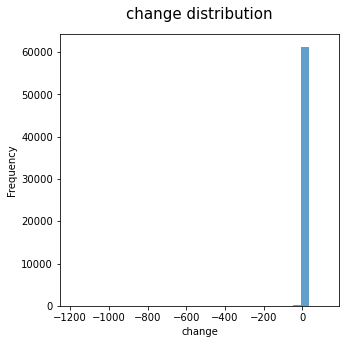

In [460]:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(x=London_underground_plot["change"],bins = 30,alpha = 0.7)
ax.set_ylabel("Frequency", fontsize =10)
ax.set_xlabel("change", fontsize = 10)
ax.set_title("change distribution", fontsize = 15, pad = 15)

fig.savefig('change distribution.jpg', dpi=200)


Text(0.5, 1.0, 'change1 distribution')

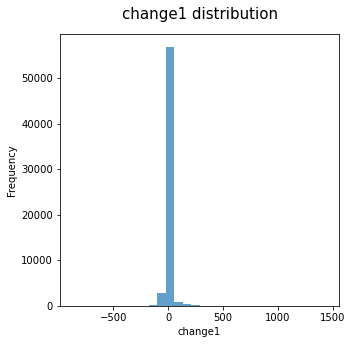

In [461]:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(x=London_underground_plot["change1"],bins = 30,alpha = 0.7)
ax.set_ylabel("Frequency", fontsize =10)
ax.set_xlabel("change1", fontsize = 10)
ax.set_title("change1 distribution", fontsize = 15, pad = 15)


Text(0.5, 1.0, 'change2 distribution')

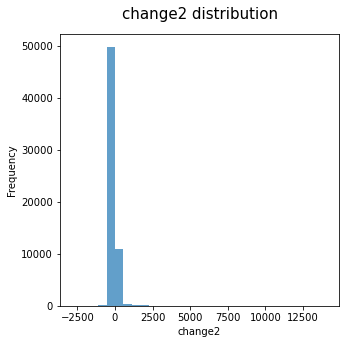

In [462]:
fig, ax = plt.subplots(figsize=(5,5))

ax.hist(x=London_underground_plot["change2"],bins = 30,alpha = 0.7)
ax.set_ylabel("Frequency", fontsize =10)
ax.set_xlabel("change2", fontsize = 10)
ax.set_title("change2 distribution", fontsize = 15, pad = 15)


### plot

### scenario A

In [463]:
G.nodes(data = True)['Canary Wharf']

{'coords': (537586.6947649193, 180311.85419390627),
 'degree': 0.01,
 'closeness': 0.08932559178204555,
 'betweenness': 0.07328592856600355,
 'bet_weighted': 0.05834586466165414,
 'deg_weighted': 136314}

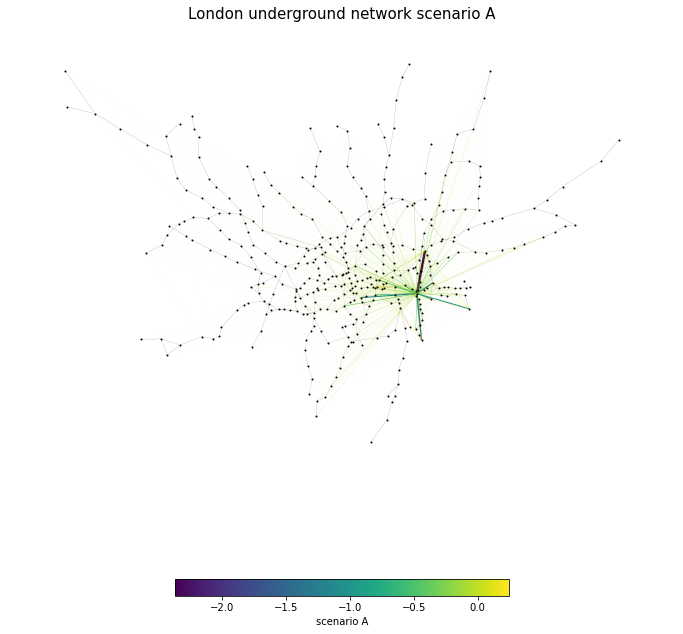

In [464]:
change_values=[(i[2]['change']) for i in G_plot.edges(data=True)]

color=[(i[2]['change']/500) for i in G_plot.edges(data=True)]
width=[abs(i[2]['change']/500) for i in G_plot.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

node_labels = 'Canary Wharf'
pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G, pos = pos, node_color= 'black', node_size= 1)
nx.draw_networkx_edges(G,pos = pos,arrows=False,width=0.1)
#nx.draw_networkx_labels(G_plot,pos = pos, node_labels, font_size=10, font_color='black')

edg=nx.draw_networkx_edges(G_plot, pos,edge_color=color, width=width)
plt.colorbar(edg,label="scenario A",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground network scenario A",fontsize=15)
plt.show()

fig.savefig('London underground network scenario A.png', dpi=150)


### scenario B1

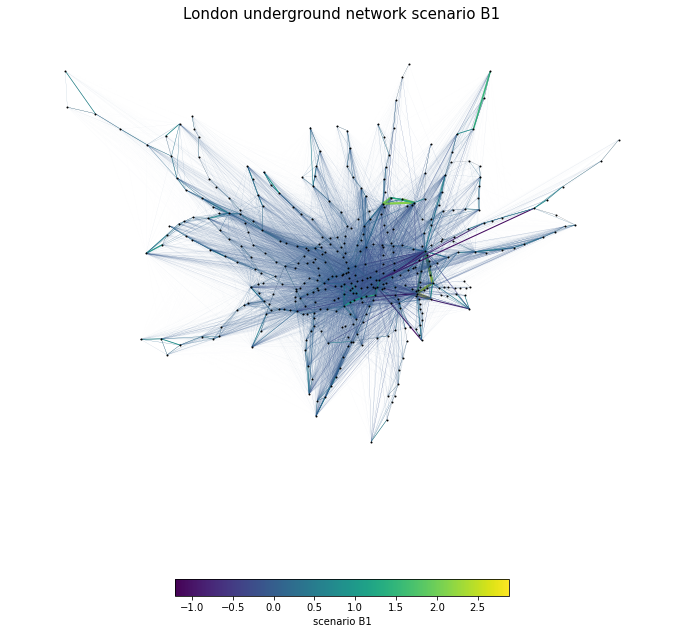

In [465]:
change_values1=[(i[2]['change1']) for i in G_plot.edges(data=True)]

color=[(i[2]['change1']/500) for i in G_plot.edges(data=True)]
width=[abs(i[2]['change1']/500) for i in G_plot.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos = pos,node_color= 'black',node_size= 1)
nx.draw_networkx_edges(G,pos = pos,arrows=False,width=0.1)

edg=nx.draw_networkx_edges(G_plot, pos,edge_color=color, width=width)
plt.colorbar(edg,label="scenario B1",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground network scenario B1",fontsize=15)
plt.show()

fig.savefig('London underground network scenario B1.png', dpi=150)


###  scenario B2

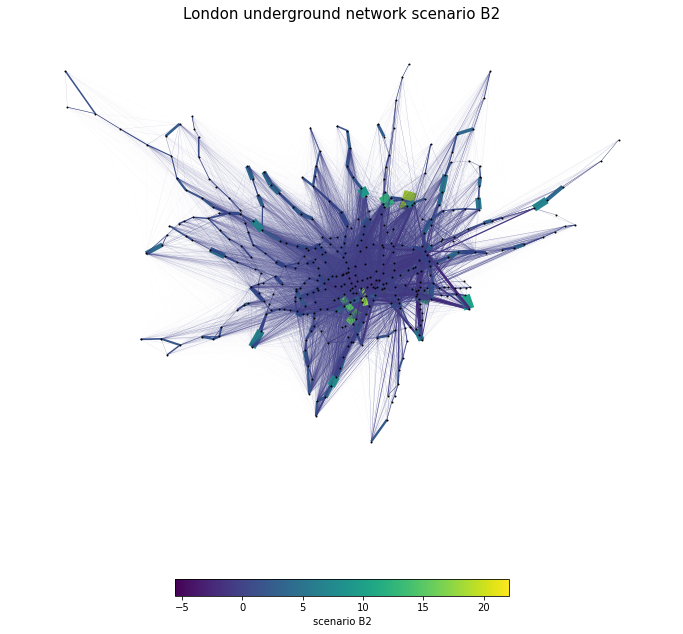

In [466]:
change_values2=[(i[2]['change2']) for i in G_plot.edges(data=True)]

color=[(i[2]['change2']/500) for i in G_plot.edges(data=True)]
width=[abs(i[2]['change2']/500) for i in G_plot.edges(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos = pos,node_color= 'black',node_size= 1)
nx.draw_networkx_edges(G,pos = pos,arrows=False,width=0.1)

edg=nx.draw_networkx_edges(G_plot, pos,edge_color=color, width=width)
plt.colorbar(edg,label="scenario B2",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground network scenario B2",fontsize=15)
plt.show()

fig.savefig('London underground network scenario B2.png', dpi=150)
